In [2]:
import statsmodels.api as sm
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)        ##to display all the rows and columns
pd.set_option("display.max_rows",None)



In [3]:
df =pd.read_csv("roadAccStats13-16.csv")

In [4]:
df.head()

SI. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                            43482.0            
1                                              308.0            
2                                             7211.0            
3                                            10200.0            
4                                            13657.0            

   State/UT-Wise Total Number of Road Accidents during - 2014  \
0                                              24440            
1                                                205            
2                                               7144            
3                                               9556            
4                                              13821            

   State/UT-Wise Total Number of Road Accidents during - 2015  \
0                                              24258            
1                                                284            
2                                               6959            
3                                               9555            
4                                              14446            

   State/UT-Wise Total Number of Road Accidents during - 2016  \
0                                              24888            
1                                                249            
2                                               7435            
3                                               8222            
4                                              13580            

   Share of States/UTs in Total Number of Road Accidents - 2013  \
0                                                8.9              
1                                                0.1              
2                                                1.5              
3                                                2.1              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2014  \
0                                                5.0              
1                                                0.0              
2                                                1.5              
3                                                2.0              
4                                                2.8              

   Share of States/UTs in Total Number of Road Accidents - 2015  \
0                                                4.8              
1                                                0.1              
2                                                1.4              
3                                                1.9              
4                                                2.9              

   Share of States/UTs in Total Number of Road Accidents - 2016  \
0                                                5.2              
1                                                0.1              
2                                                1.5              
3                                                1.7              
4                                                2.8              

   Total Number of Accidents Per Lakh Population - 2013  \
0                                               50.4      
1                                               24.3      
2                                               23.0      
3                                               10.2      
4                                               54.8      

   Total Number of Accidents Per Lakh Population - 2014  \
0                                               28.1      
1                                               16.0      
2                                               22.5      
3                                         

In [5]:
    df1 = pd.read_csv("Details_of_road_accident_deaths_by_situation_state_2014.csv")



In [6]:
df1.head()

States/UTs  Year                                 CrimeHead  \
0  Andhra Pradesh  2014                       Truck/Lorry (Total)   
1  Andhra Pradesh  2014       Truck/Lorry - Normal Goods Carriers   
2  Andhra Pradesh  2014  Truck/Lorry - Trailer/Container Carriers   
3  Andhra Pradesh  2014                     Truck/Lorry - Tankers   
4  Andhra Pradesh  2014                      Truck/Lorry - Others   

   Offenders (Driver/Pedestrian) Died_Male  \
0                                      445   
1                                      357   
2                                       12   
3                                       10   
4                                       66   

   Offenders (Driver/Pedestrian) Died_Female  \
0                                         30   
1                                         25   
2                                          0   
3                                          0   
4                                          5   

   Offenders (Driver/Pedestrian) Died_Transgender  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
0                                       475                871   
1                                       382                577   
2                                        12                 25   
3                                        10                102   
4                                        71                167   

   Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
0                  135                         0                1006  
1                  101                         0                 678  
2                    0                         0                  25  
3                   15                         0                 117  
4                   19                         0                 186

In [7]:
df2 =pd.read_csv("Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv")



In [8]:
df2.head()

S. No.          State/ UT  Non-wearing of Helmet - Male  \
0      1     Andhra Pradesh                           459   
1      2  Arunachal Pradesh                            10   
2      3              Assam                             0   
3      4              Bihar                             0   
4      5       Chhattisgarh                            89   

   Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                              18                            477   
1                               4                             14   
2                               0                              0   
3                               0                              0   
4                               7                             96   

   Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
0                              222                                 15   
1                                0                                  0   
2                                0                                  0   
3                                0                                  0   
4                                6                                  0   

   Non-wearing of seat belt - Total  
0                               237  
1                                 0  
2                                 0  
3                                 0  
4                                 6

In [9]:
df3 =pd.read_excel("accidents03-16.xls") 




WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [10]:
df3.head()

States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   
2              Assam  1120.0  1177.0  1420.0   1627.0   1483.0   1641.0   
3              Bihar  2138.0  1579.0  1462.0   2315.0   3074.0   3514.0   
4       Chhattisgarh  1788.0  1892.0  2049.0   2288.0   2496.0   2600.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103  
2   1735.0   1924.0   2015.0   2011.0   2162.0  2169  2122  2445  
3   4038.0   4513.0   4676.0   4706.0   4612.0  4505  4771  4425  
4   2566.0   2668.0   2659.0   2783.0   3059.0  3570  3710  3527

In [11]:
df3.iloc[:1, 0:17]       #---[row,columns] ie [0 to 1 row,0 to 17 range column]

States/Uts    2003    2004    2005     2006     2007     2008     2009  \
0  Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0  12676.0   

      2010     2011     2012     2013  2014  2015  2016  
0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851

In [12]:
df4=pd.read_csv('laneAccidents.csv')

In [13]:
df4.head()

S.No           State/UT  Single Lane - Accident - 2014  \
0    1     Andhra Pradesh                         8634.0   
1    2  Arunachal Pradesh                           90.0   
2    3              Assam                         3888.0   
3    4              Bihar                         3731.0   
4    5       Chhattisgarh                         7961.0   

   Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                    16.473750                       2958.0   
1                                     6.504173                         60.0   
2                                    12.459312                       1217.0   
3                                     3.584073                       1815.0   
4                                    31.164370                       2244.0   

   Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
0                                   5.643891                       13541.0   
1                                   4.336115                         152.0   
2                                   3.899944                        3195.0   
3                                   1.743525                        2475.0   
4                                   8.784430                        7762.0   

   Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
0                                   25.836350                      10327.0   
1                                   10.984826                        115.0   
2                                   10.238555                       2432.0   
3                                    2.377534                       4156.0   
4                                   30.385359                       4696.0   

   Two Lanes - Accident - 2014 per 1L people  Two Lanes - Killed - 2014  \
0                                  19.704009                     2994.0   
1                                   8.310888                       59.0   
2                                   7.793479                     1035.0   
3                                   3.992336                     2096.0   
4                                  18.383103                     1524.0   

   Two Lanes - Killed - 2014 per 1L people  Two Lanes - Injured - 2014  \
0                                 5.712579                     10122.0   
1                                 4.263847                       156.0   
2                                 3.316715                      2510.0   
3                                 2.013459                      3092.0   
4                                 5.965896                      4661.0   

   Two Lanes - Injured - 2014 per 1L people  \
0                                 19.312868   
1                                 11.273900   
2                                  8.043434   
3                                  2.970237   
4                                 18.246091   

   3 Lanes or more w.o Median - Accident - 2014  \
0                                        1188.0   
1                                           0.0   
2                                          56.0   
3                                         756.0   
4                                           0.0   

   3 Lanes or more w.o Median - Accident - 2014 per 1L people  \
0                                           2.266715            
1                                           0.000000            
2                                           0.179455            
3                                           0.726229            
4                                           0.000000            

   3 Lanes or more w.o Median - Killed - 2014  \
0                                       396.0   
1                                         0.0   
2                                        25.0   
3                                       390.0   
4                                         0.0   

   3 Lanes or more w.o Median - Killed - 2014 per 1L peo

In [14]:
df5 =pd.read_csv('reasonOfAccident.csv')

In [15]:
df5.head()

Sl. No         States/UTs  \
0      1     Andhra Pradesh   
1      2  Arunachal Pradesh   
2      3              Assam   
3      4              Bihar   
4      5       Chhattisgarh   

   Fault of Driver-Total No. of Road Accidents - 2014  \
0                                            21359.0    
1                                               30.0    
2                                             6895.0    
3                                             5008.0    
4                                             9108.0    

   Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                          40.753165                  
1                                           2.168058                  
2                                          22.095410                  
3                                           4.810784                  
4                                          35.654451                  

   Fault of Driver-Number of Persons-Killed - 2014  \
0                                             6743   
1                                               19   
2                                             2429   
3                                             2646   
4                                             2458   

   Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
0                                          12.865705               
1                                           1.373103               
2                                           7.783865               
3                                           2.541800               
4                                           9.622161               

   Fault of Driver-Number of Persons-Injured - 2014  \
0                                           26287.0   
1                                              30.0   
2                                            6281.0   
3                                            3374.0   
4                                            8710.0   

   Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
0                                          50.155834                
1                                           2.168058                
2                                          20.127813                
3                                           3.241131                
4                                          34.096428                

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
0                                              288.0                      
1                                               20.0                      
2                                                2.0                      
3                                              608.0                      
4                                              726.0                      

   Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
0                                           0.549507                                    
1                                           1.445372                                    
2                                           0.006409                                    
3                                           0.584057                                    
4                                           2.842021                                    

   Fault of Driver of other vehicles-Number of Persons-Killed - 2014  \
0                                                 75                   
1                                                 14                   
2                                                  1                   
3                                                254                   
4                                                253                   

   Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people  \
0                                           0.143101        

In [16]:
df6 =pd.read_csv('typeOfVehicle.csv')

In [17]:
df6.head()

Sl. No.         States/UTs  \
0       1     Andhra Pradesh   
1       2  Arunachal Pradesh   
2       3              Assam   
3       4              Bihar   
4       5       Chhattisgarh   

   Two-Wheelers - Number of Road Accidents - Fatal - 2014  \
0                                               1961        
1                                                 15        
2                                                489        
3                                                769        
4                                               1074        

   Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people  \
0                                           3.741606                      
1                                           1.084029                      
2                                           1.567028                      
3                                           0.738717                      
4                                           4.204313                      

   Two-Wheelers - Number of Road Accidents - Total - 2014  \
0                                               7239        
1                                                 34        
2                                               1508        
3                                               1750        
4                                               4787        

   Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people  \
0                                          13.812077                      
1                                           2.457132                      
2                                           4.832470                      
3                                           1.681085                      
4                                          18.739334                      

   Two-Wheelers - Number of Persons - Killed - 2014  \
0                                              2003   
1                                                21   
2                                               537   
3                                               820   
4                                              1126   

   Two-Wheelers - Number of Persons - Killed - 2014 per 1L people  \
0                                           3.821742                
1                                           1.517640                
2                                           1.720846                
3                                           0.787708                
4                                           4.407873                

   Two-Wheelers - Number of Persons - Injured - 2014  \
0                                               7333   
1                                                 30   
2                                               1342   
3                                               1131   
4                                               4295   

   Two-Wheelers - Number of Persons - Injured - 2014 per 1L people  \
0                                          13.991430                 
1                                           2.168058                 
2                                           4.300513                 
3                                           1.086461                 
4                                          16.813336                 

   Auto-Rickshaws - Number of Road Accidents - Fatal - 2014  \
0                                                950          
1                                                  7          
2                                                 65          
3                                                126          
4                                                 31          

   Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people  \
0                                           1.812609                        
1                                           0.505880                        
2                                           0.208296       

In [18]:
df7 = pd.read_excel('timeOfOccurence.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [19]:
df7.tail(2)

S. No.  States/Uts  06-900hrs - Day - 2014  09-1200hrs - Day - 2014  \
35     36  Puducherry                     115                      155   
36  Total       Total                   53450                    78137   

    12-1500hrs - Day - 2014  15-1800hrs - Day - 2014  \
35                      178                      203   
36                    76384                    84436   

    18-2100hrs - Night - 2014  21-2400hrs - Night - 2014  \
35                        251                        139   
36                      83254                      52570   

    00-300hrs - Night - 2014  03-600hrs - Night - 2014  \
35                        29                        41   
36                     29179                     31990   

    Total Accidents - 2014  06-900hrs - (Day) - 2016  \
35                    1111                       221   
36                  489400                     54522   

    09-1200hrs - (Day) - 2016  12-1500hrs - (Day) - 2016  \
35                        233                        246   
36                      75771                      73380   

    15-1800hrs - (Day) - 2016  18-2100hrs - (Night) - 2016  \
35                        253                          330   
36                      85834                        84555   

    21-2400hrs - (Night) - 2016  00-300hrs - (Night) - 2016  \
35                          239                         144   
36                        50970                       25976   

    03-600hrs - (Night) - 2016  Total Accidents - 2016  
35                         100                    1766  
36                       29644                  480652

In [20]:
df8=pd.read_excel('location.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [21]:
df8.head()

S. No.          State/ UT  Near School or College - Total Acc. - 2014  \
0      1     Andhra Pradesh                                      1110.0   
1      2  Arunachal Pradesh                                        23.0   
2      3              Assam                                       409.0   
3      4              Bihar                                       699.0   
4      5       Chhattisgarh                                       577.0   

   Near School or College - Persons Killed - 2014  \
0                                           301.0   
1                                             8.0   
2                                           157.0   
3                                           342.0   
4                                           162.0   

   Near School or College - Persons Injured - 2014  \
0                                           1486.0   
1                                             48.0   
2                                            348.0   
3                                            517.0   
4                                            579.0   

   Near or inside a village - Total Acc. - 2014  \
0                                        3782.0   
1                                           0.0   
2                                         792.0   
3                                        2050.0   
4                                        3444.0   

   Near or inside a village - Persons Killed - 2014  \
0                                            1255.0   
1                                               0.0   
2                                             296.0   
3                                            1064.0   
4                                            1160.0   

   Near or inside a village - Persons Injured - 2014  \
0                                             4762.0   
1                                                0.0   
2                                              716.0   
3                                             1443.0   
4                                             3470.0   

   Near a Factory/Industrial area - Total Acc. - 2014  \
0                                              830.0    
1                                                0.0    
2                                              364.0    
3                                              349.0    
4                                              658.0    

   Near a Factory/Industrial area - Persons Killed - 2014  \
0                                              277.0        
1                                                0.0        
2                                              123.0        
3                                              161.0        
4                                              220.0        

   Near a Factory/Industrial area - Persons Injured - 2014  \
0                                              981.0         
1                                                0.0         
2                                              254.0         
3                                              234.0         
4                                              498.0         

   Near a religious place - Total Acc. - 2014  \
0                                       760.0   
1                                         5.0   
2                                       209.0   
3                                       362.0   
4                                       512.0   

   Near a religious place - Persons Killed - 2014  \
0                                           230.0   
1                                             4.0   
2                                            73.0   
3                                           170.0   
4                                           125.0   

   Near a religious place - Persons Injured - 2014  \
0                                            891.0   
1                                             15.0   
2                                            212.0   
3                  

With your analysis, you must answer to the below questions either in a statistical analysis or in a graphical representation using python code snippets.



### 1.The percentage of road accidents during all the years.

In [22]:
Total_accident_2013 = df[df['States/UTs']!='Total']['State/UT-Wise Total Number of Road Accidents during - 2013'].sum()
Total_accident_2013

486476.0

In [23]:
Total_states = df[df['States/UTs']!='Total']['States/UTs'].count()
Total_states

36

In [24]:
avg_accident_2013 = Total_accident_2013/Total_states
avg_accident_2013

13513.222222222223

In [25]:
df['State/UT-Wise Total Number of Road Accidents during - 2013']=df['State/UT-Wise Total Number of Road Accidents during - 2013'].replace(np.nan,avg_accident_2013).round()


In [26]:
Total_updated_sum_2013 = df[df['States/UTs']!='Total']['State/UT-Wise Total Number of Road Accidents during - 2013'].sum()
Total_updated_sum_2013

499989.0

In [27]:
df['State/UT-Wise Total Number of Road Accidents during - 2013'] = df['State/UT-Wise Total Number of Road Accidents during - 2013'].replace(Total_accident_2013,Total_updated_sum_2013)


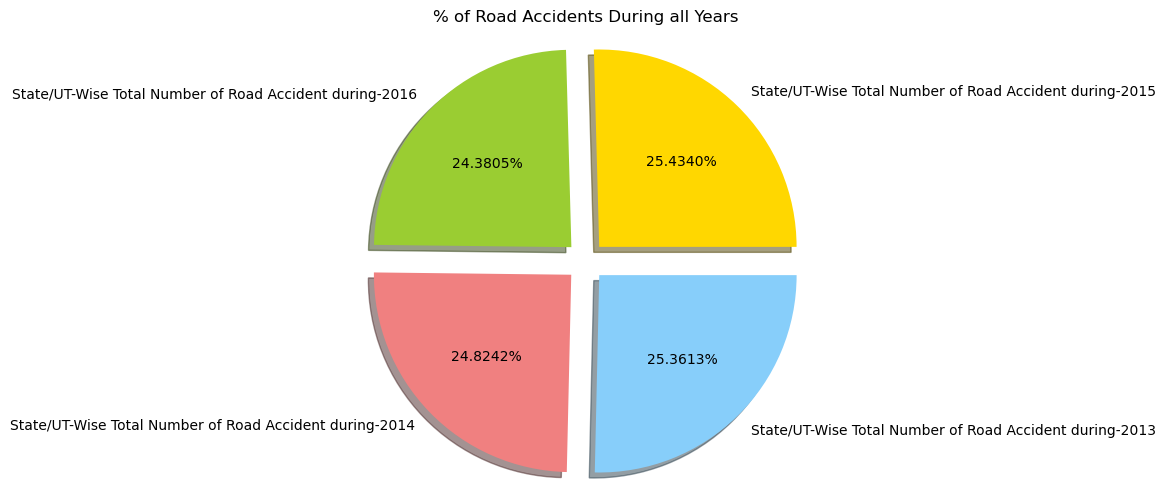

In [28]:
a_2013 = df[df['States/UTs']=='Total']['State/UT-Wise Total Number of Road Accidents during - 2013'].max()
a_2014 = df[df['States/UTs']=='Total']['State/UT-Wise Total Number of Road Accidents during - 2014'].max()
a_2015 = df[df['States/UTs']=='Total']['State/UT-Wise Total Number of Road Accidents during - 2015'].max()
a_2016 = df[df['States/UTs']=='Total']['State/UT-Wise Total Number of Road Accidents during - 2016'].max()

labels = ['State/UT-Wise Total Number of Road Accident during-2015',
          'State/UT-Wise Total Number of Road Accident during-2016',
          'State/UT-Wise Total Number of Road Accident during-2014',
          'State/UT-Wise Total Number of Road Accident during-2013']
sizes = [a_2015, a_2016, a_2014, a_2013] 
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('% of Road Accidents During all Years')
plt.show()

### 2.Mean Accidents per 1L population for each year.

In [29]:
dfQ2 = df.drop(36)

In [30]:
dfQ2['Total Number of Accidents Per Lakh Population - 2013']=dfQ2['Total Number of Accidents Per Lakh Population - 2013'].replace(np.nan, dfQ2['Total Number of Accidents Per Lakh Population - 2013'].mean().round())


In [31]:
dfQ2.tail(1)

SI. No.  States/UTs  \
35      36  Puducherry   

    State/UT-Wise Total Number of Road Accidents during - 2013  \
35                                             1451.0            

    State/UT-Wise Total Number of Road Accidents during - 2014  \
35                                               1111            

    State/UT-Wise Total Number of Road Accidents during - 2015  \
35                                               1530            

    State/UT-Wise Total Number of Road Accidents during - 2016  \
35                                               1766            

    Share of States/UTs in Total Number of Road Accidents - 2013  \
35                                                0.3              

    Share of States/UTs in Total Number of Road Accidents - 2014  \
35                                                0.2              

    Share of States/UTs in Total Number of Road Accidents - 2015  \
35                                                0.3              

    Share of States/UTs in Total Number of Road Accidents - 2016  \
35                                                0.4              

    Total Number of Accidents Per Lakh Population - 2013  \
35                                               95.9      

    Total Number of Accidents Per Lakh Population - 2014  \
35                                               70.6      

    Total Number of Accidents Per Lakh Population - 2015  \
35                                               94.1      

    Total Number of Accidents Per Lakh Population - 2016  \
35                                              105.8      

    Total Number of Road Accidents per 10,000 Vehicles - 2013  \
35                                               20.7           

    Total Number of Road Accidents per 10,000 Vehicles - 2014  \
35                                               14.8           

    Total Number of Road Accidents per 10,000 Vehicles - 2015  \
35                                               19.1           

    Total Number of Road Accidents per 10,000 Km of Roads - 2013  \
35                                             5020.5              

    Total Number of Road Accidents per 10,000 Km of Roads - 2014  \
35                                             3678.9              

    Total Number of Road Accidents per 10,000 Km of Roads - 2015  
35                                             4980.2

Mean Accidents per 100,000 Population for Each Year:
2013: 34893391.838139705
2014: 35396210.332910426
2015: 35837761.40493548
2016: 36268790.269774474


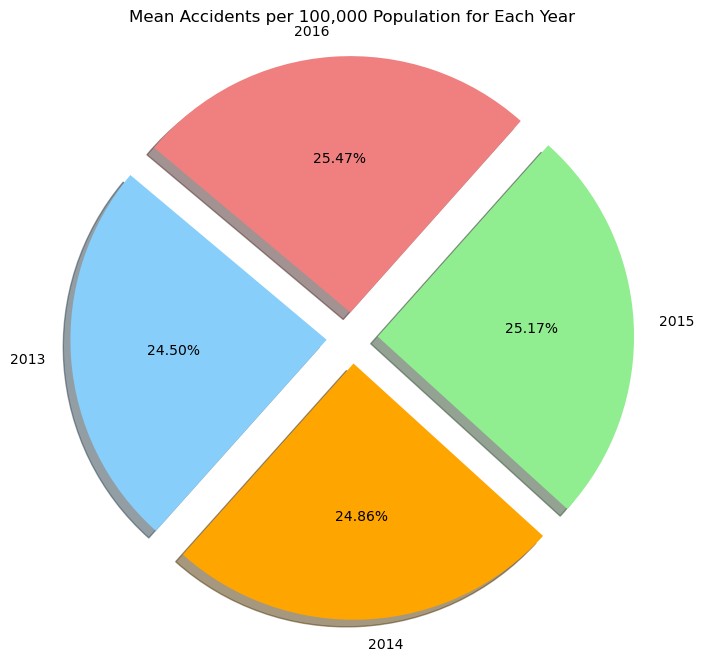

In [32]:
# Calculate mean accidents per 100,000 population for each year
accidents_per_100k_2013 = dfQ2['State/UT-Wise Total Number of Road Accidents during - 2013'] / dfQ2['Total Number of Accidents Per Lakh Population - 2013'] * 100000
accidents_per_100k_2014 = dfQ2['State/UT-Wise Total Number of Road Accidents during - 2014'] / dfQ2['Total Number of Accidents Per Lakh Population - 2014'] * 100000
accidents_per_100k_2015 = dfQ2['State/UT-Wise Total Number of Road Accidents during - 2015'] / dfQ2['Total Number of Accidents Per Lakh Population - 2015'] * 100000
accidents_per_100k_2016 = dfQ2['State/UT-Wise Total Number of Road Accidents during - 2016'] / dfQ2['Total Number of Accidents Per Lakh Population - 2016'] * 100000

# Calculate mean accidents per 100,000 population for each year
mean_accidents_per_100k_2013 = accidents_per_100k_2013.mean()
mean_accidents_per_100k_2014 = accidents_per_100k_2014.mean()
mean_accidents_per_100k_2015 = accidents_per_100k_2015.mean()
mean_accidents_per_100k_2016 = accidents_per_100k_2016.mean()

# Print mean accidents per 100,000 population for each year
print("Mean Accidents per 100,000 Population for Each Year:")
print("2013:", mean_accidents_per_100k_2013)
print("2014:", mean_accidents_per_100k_2014)
print("2015:", mean_accidents_per_100k_2015)
print("2016:", mean_accidents_per_100k_2016)

# Create labels and sizes for the pie chart
labels = ['2013', '2014', '2015', '2016']
sizes = [mean_accidents_per_100k_2013, mean_accidents_per_100k_2014, mean_accidents_per_100k_2015, mean_accidents_per_100k_2016]
colors = ['lightskyblue', 'orange', 'lightgreen', 'lightcoral']
explode = (0.1, 0.1, 0.1, 0.1)  # explode all slices slightly

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Mean Accidents per 100,000 Population for Each Year')
plt.show()


### 3.The highest number of accident states and least number of accident states.

In [33]:
## How to display only a particular row
df.iloc[[36]]

SI. No. States/UTs  \
36   Total      Total   

    State/UT-Wise Total Number of Road Accidents during - 2013  \
36                                           499989.0            

    State/UT-Wise Total Number of Road Accidents during - 2014  \
36                                             489400            

    State/UT-Wise Total Number of Road Accidents during - 2015  \
36                                             501423            

    State/UT-Wise Total Number of Road Accidents during - 2016  \
36                                             480652            

    Share of States/UTs in Total Number of Road Accidents - 2013  \
36                                              100.0              

    Share of States/UTs in Total Number of Road Accidents - 2014  \
36                                              100.0              

    Share of States/UTs in Total Number of Road Accidents - 2015  \
36                                              100.0              

    Share of States/UTs in Total Number of Road Accidents - 2016  \
36                                              100.0              

    Total Number of Accidents Per Lakh Population - 2013  \
36                                               40.0      

    Total Number of Accidents Per Lakh Population - 2014  \
36                                               40.5      

    Total Number of Accidents Per Lakh Population - 2015  \
36                                               38.3      

    Total Number of Accidents Per Lakh Population - 2016  \
36                                               37.9      

    Total Number of Road Accidents per 10,000 Vehicles - 2013  \
36                                               27.0           

    Total Number of Road Accidents per 10,000 Vehicles - 2014  \
36                                               26.3           

    Total Number of Road Accidents per 10,000 Vehicles - 2015  \
36                                               22.9           

    Total Number of Road Accidents per 10,000 Km of Roads - 2013  \
36                                             1129.8              

    Total Number of Road Accidents per 10,000 Km of Roads - 2014  \
36                                             1113.7              

    Total Number of Road Accidents per 10,000 Km of Roads - 2015  
36                                             1051.3

In [34]:
dfQ3 = df.drop(36)

dfQ3

SI. No.                 States/UTs  \
0        1             Andhra Pradesh   
1        2          Arunachal Pradesh   
2        3                      Assam   
3        4                      Bihar   
4        5               Chhattisgarh   
5        6                        Goa   
6        7                    Gujarat   
7        8                    Haryana   
8        9           Himachal Pradesh   
9       10            Jammu & Kashmir   
10      11                  Jharkhand   
11      12                  Karnataka   
12      13                     Kerala   
13      14             Madhya Pradesh   
14      15                Maharashtra   
15      16                    Manipur   
16      17                  Meghalaya   
17      18                    Mizoram   
18      19                   Nagaland   
19      20                     Odisha   
20      21                     Punjab   
21      22                  Rajasthan   
22      23                     Sikkim   
23      24                 Tamil Nadu   
24      25                  Telangana   
25      26                    Tripura   
26      27                Uttarakhand   
27      28              Uttar Pradesh   
28      29                West Bengal   
29      30  Andaman & Nicobar Islands   
30      31                 Chandigarh   
31      32       Dadra & Nagar Haveli   
32      33                Daman & Diu   
33      34                      Delhi   
34      35                Lakshadweep   
35      36                 Puducherry   

    State/UT-Wise Total Number of Road Accidents during - 2013  \
0                                             43482.0            
1                                               308.0            
2                                              7211.0            
3                                             10200.0            
4                                             13657.0            
5                                              4294.0            
6                                             25391.0            
7                                             10482.0            
8                                              2981.0            
9                                              6457.0            
10                                             5569.0            
11                                            44020.0            
12                                            35215.0            
13                                            51810.0            
14                                            63019.0            
15                                              671.0            
16                                              525.0            
17                                              114.0            
18                                               71.0            
19                                             9680.0            
20                                             6323.0            
21                                            23592.0            
22                                              244.0            
23                                            66238.0            
24                                            13513.0            
25                                              818.0            
26                                             1297.0            
27                                            30615.0            
28                                            12414.0            
29                                              200.0            
30                                              410.0            
31                                               91.0            
32                                               59.0            
33                                             7566.0            
34                                                1.0            
35                                             1451.0            

    State/UT-Wise Total Number of Road Acc

In [35]:
# Assuming dfQ2 is the DataFrame

# Columns to consider for finding maximum value
columns_to_check = ['State/UT-Wise Total Number of Road Accidents during - 2013',
                   'State/UT-Wise Total Number of Road Accidents during - 2014',
                   'State/UT-Wise Total Number of Road Accidents during - 2015',
                   'State/UT-Wise Total Number of Road Accidents during - 2016']

In [36]:
# Find maximum value for each row in specified columns
dfQ3['Max_value'] = dfQ3[columns_to_check].max(axis=1)

In [37]:
# Print the maximum value for each row
for index, row in dfQ3.iterrows():
    max_value = row['Max_value']
    print(f"Row {index + 1}: Maximum value is {max_value}")

Row 1: Maximum value is 43482.0
Row 2: Maximum value is 308.0
Row 3: Maximum value is 7435.0
Row 4: Maximum value is 10200.0
Row 5: Maximum value is 14446.0
Row 6: Maximum value is 4338.0
Row 7: Maximum value is 25391.0
Row 8: Maximum value is 11234.0
Row 9: Maximum value is 3168.0
Row 10: Maximum value is 6457.0
Row 11: Maximum value is 5569.0
Row 12: Maximum value is 44403.0
Row 13: Maximum value is 39420.0
Row 14: Maximum value is 54947.0
Row 15: Maximum value is 63805.0
Row 16: Maximum value is 743.0
Row 17: Maximum value is 620.0
Row 18: Maximum value is 132.0
Row 19: Maximum value is 305.0
Row 20: Maximum value is 10542.0
Row 21: Maximum value is 6952.0
Row 22: Maximum value is 24628.0
Row 23: Maximum value is 244.0
Row 24: Maximum value is 71431.0
Row 25: Maximum value is 22811.0
Row 26: Maximum value is 818.0
Row 27: Maximum value is 1591.0
Row 28: Maximum value is 35612.0
Row 29: Maximum value is 13580.0
Row 30: Maximum value is 258.0
Row 31: Maximum value is 428.0
Row 32: Max

In [38]:
# Display DataFrame with new column
#print("\nDataFrame with new column 'Max_value':")
#print(dfQ3)

In [39]:
dfQ3

# Set 'States' as index
dfQ3.set_index('States/UTs', inplace=True)
dfQ3['Max_value'] = dfQ3[columns_to_check].max(axis=1)

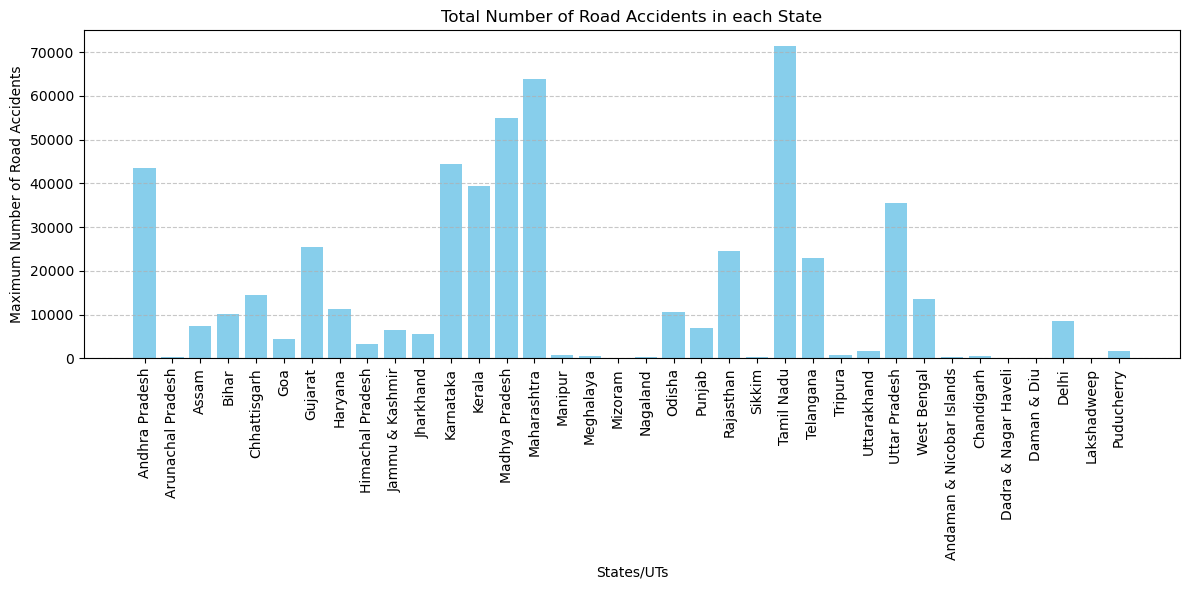

In [40]:
# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(dfQ3.index, dfQ3['Max_value'], color='skyblue')
plt.title('Total Number of Road Accidents in each State')
plt.xlabel('States/UTs')
plt.ylabel('Maximum Number of Road Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [41]:
## To show the maximum number of Road accident in Descending order states wise 

dfQ3['Max_value'] = dfQ3[columns_to_check].max(axis=1)

In [42]:
# Sort DataFrame by 'Max_value' in descending order
dfQ3_sorted = dfQ3.sort_values(by='Max_value', ascending=False)

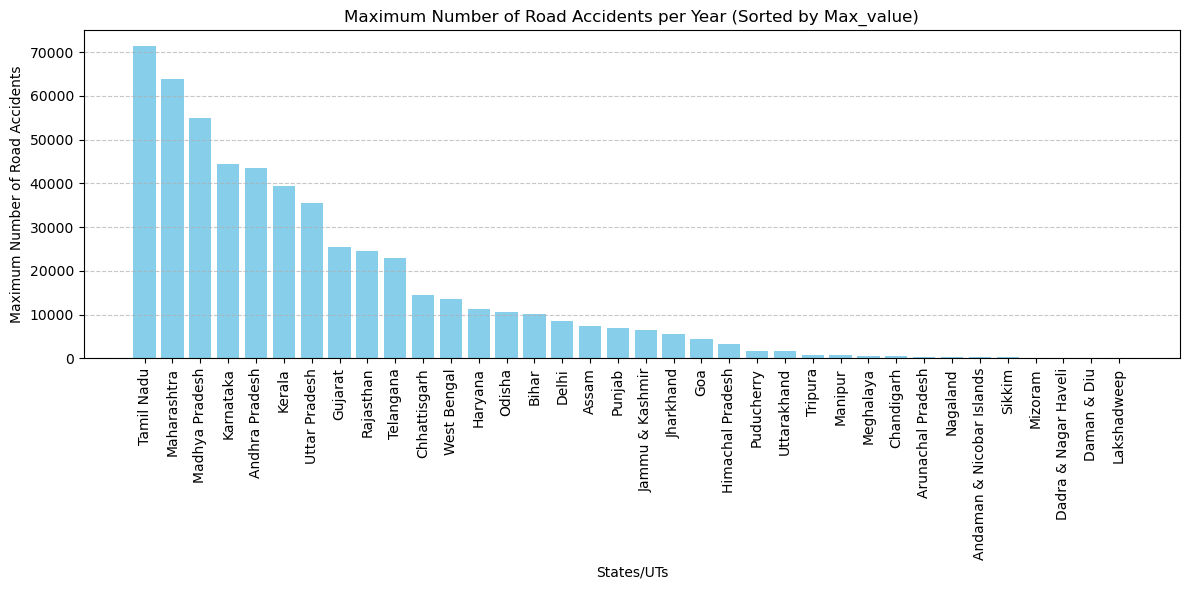

In [43]:
# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(dfQ3_sorted.index, dfQ3_sorted['Max_value'], color='skyblue')
plt.title('Maximum Number of Road Accidents per Year (Sorted by Max_value)')
plt.xlabel('States/UTs')
plt.ylabel('Maximum Number of Road Accidents')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4.Offenders and victims who died according to gender as well the as the total deaths.

In [44]:
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')

In [45]:
df1.tail(1)

States/UTs  Year CrimeHead  \
1442  Total (All India)  2014     Total   

      Offenders (Driver/Pedestrian) Died_Male  \
1442                                    31449   

      Offenders (Driver/Pedestrian) Died_Female  \
1442                                       2803   

      Offenders (Driver/Pedestrian) Died_Transgender  \
1442                                               0   

      Offenders (Driver/Pedestrian) Died_Total  Victims Died_Male  \
1442                                     34252              89683   

      Victims Died_Female  Victims Died_Transgender  Victims Died_Total  
1442                17574                        17              107274

In [46]:
df1.shape

(1443, 11)

In [47]:
df1.isnull().sum()

States/UTs                                        0
Year                                              0
CrimeHead                                         0
Offenders (Driver/Pedestrian) Died_Male           0
Offenders (Driver/Pedestrian) Died_Female         0
Offenders (Driver/Pedestrian) Died_Transgender    0
Offenders (Driver/Pedestrian) Died_Total          0
Victims Died_Male                                 0
Victims Died_Female                               0
Victims Died_Transgender                          0
Victims Died_Total                                0
dtype: int64

In [48]:
df1.iloc[-1,3:11]                      

Offenders (Driver/Pedestrian) Died_Male            31449
Offenders (Driver/Pedestrian) Died_Female           2803
Offenders (Driver/Pedestrian) Died_Transgender         0
Offenders (Driver/Pedestrian) Died_Total           34252
Victims Died_Male                                  89683
Victims Died_Female                                17574
Victims Died_Transgender                              17
Victims Died_Total                                107274
Name: 1442, dtype: object

In [49]:
## This code is giving you a range of columns it starts from 3rd index column and end at 5th col
## in below code -5 means it take 5 rows from the bottom
## df1.iloc[-5:,3:6]

## This below code selects last row from the bottom and selects columns ranging from index(3 to 10)
df1.iloc[-1:,3:11]

## This code select only a particular value from a last row and 3rd column (from the bottom)
df1.iloc[-1,3]

31449

In [50]:
## To show the values in pie chart

labels = ['Offenders Died Male',
          'Offenders Died Female',
          'Offenders Died Transgender',
          'Victims Died Male',
          'Victims Died Female',
          'Victims Died Transgender',
          'Offenders Died Total',
          'Victims Died Total']
sizes = [df1.iloc[-1,3], df1.iloc[-1,4], df1.iloc[-1,5] ,
         df1.iloc[-1,6], df1.iloc[-1,7] , df1.iloc[-1,8],
         df1.iloc[-1,9], df1.iloc[-1,10]] 
colors = ['yellow', 'orange', 'blue' , 'green', 'red', 'gold', 'violet', 'cyan']
explode = (0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1 , 0.1)

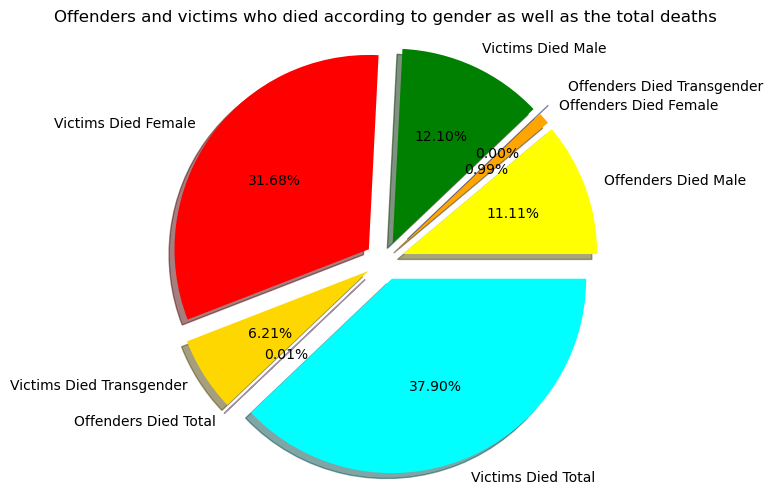

In [51]:
## To show the values in pie chart

labels = ['Offenders Died Male',
          'Offenders Died Female',
          'Offenders Died Transgender',
          'Victims Died Male',
          'Victims Died Female',
          'Victims Died Transgender',
          'Offenders Died Total',
          'Victims Died Total']
sizes = [df1.iloc[-1,3], df1.iloc[-1,4], df1.iloc[-1,5] ,
         df1.iloc[-1,6], df1.iloc[-1,7] , df1.iloc[-1,8],
         df1.iloc[-1,9], df1.iloc[-1,10]] 
colors = ['yellow', 'orange', 'blue' , 'green', 'red', 'gold', 'violet', 'cyan']
explode = (0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1 , 0.1)

plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Offenders and victims who died according to gender as well as the total deaths')
plt.show()


In [52]:
## What range i need to consider, so i only show these rows
df1.iloc[1406:1443]

Offenders_Died_Male = df1['Offenders (Driver/Pedestrian) Died_Male'].iloc[1406:1443].sum()
Offenders_Died_Male

Offenders_Died_Female = df1['Offenders (Driver/Pedestrian) Died_Female'].iloc[1406:1443].sum()
Offenders_Died_Female

Offenders_Died_Transgender = df1['Offenders (Driver/Pedestrian) Died_Transgender'].iloc[1406:1443].sum()
Offenders_Died_Transgender

Victims_Died_Male = df1['Victims Died_Male'].iloc[1406:1443].sum()
Victims_Died_Male

Victims_Died_Female = df1['Victims Died_Female'].iloc[1406:1443].sum()
Victims_Died_Female

Victims_Died_Transgender = df1['Victims Died_Transgender'].iloc[1406:1443].sum()
Victims_Died_Transgender

Offenders_Died_Total = df1['Offenders (Driver/Pedestrian) Died_Total'].iloc[1406:1443].sum()
Offenders_Died_Total

Victims_Died_Total = df1['Victims Died_Total'].iloc[1406:1443].sum()
Victims_Died_Total

406255

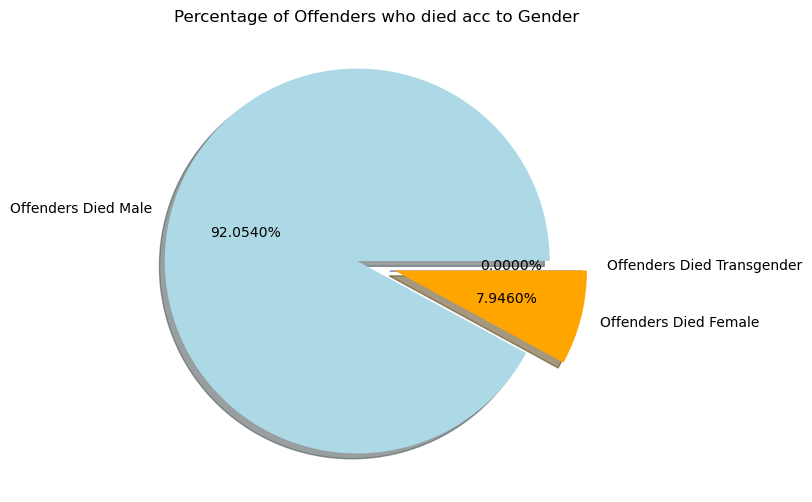

In [53]:
## Pie chart Representation (seperately)

## Percentage of Offender who died acc to Gender
labels = ['Offenders Died Male',
          'Offenders Died Female',
          'Offenders Died Transgender']
sizes = [Offenders_Died_Male, Offenders_Died_Female, Offenders_Died_Transgender] 
colors = ['lightblue', 'orange', 'blue']
explode = (0.1, 0.1, 0.1)  # explode 1st slice


plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Offenders who died acc to Gender')
plt.show()

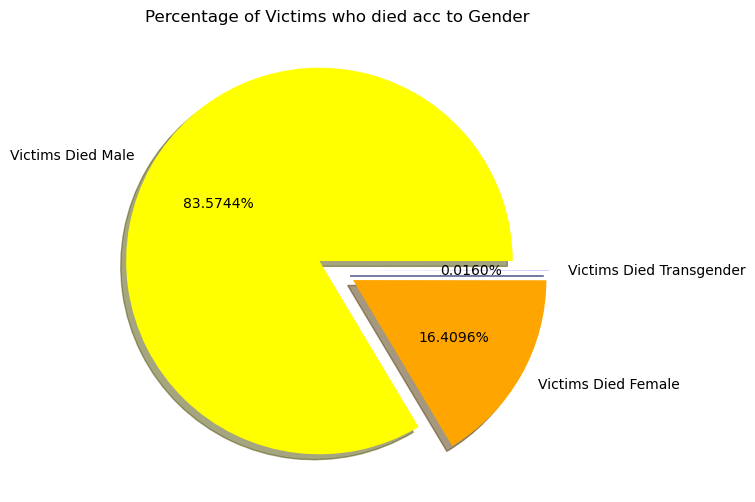

In [54]:
## pie chart Representation (seperately)

## Percentage of Victims who died acc to Gender
labels = ['Victims Died Male',
          'Victims Died Female',
          'Victims Died Transgender']
sizes = [Victims_Died_Male, Victims_Died_Female, Victims_Died_Transgender] 
colors = ['yellow', 'orange', 'blue']
explode = (0.1, 0.1, 0.1)  # explode 1st slice


plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.4f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Victims who died acc to Gender')
plt.show()

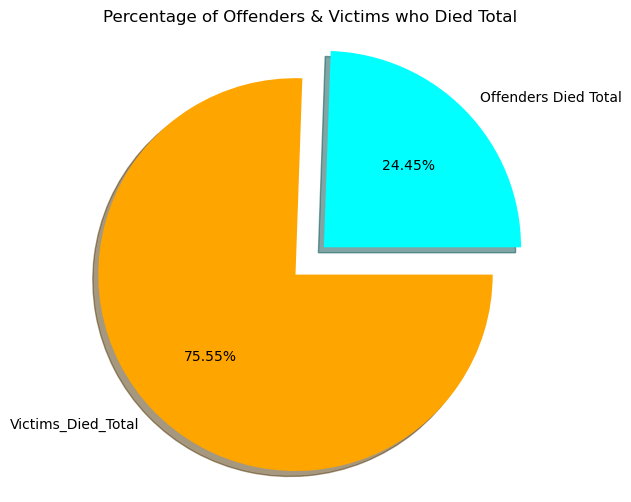

In [55]:
## Pie chart Representation (seperately)

## Percentage of Offenders & Victims who Died Total
labels = ['Offenders Died Total',
          'Victims_Died_Total']
sizes = [Offenders_Died_Total, Victims_Died_Total] 
colors = ['cyan', 'orange']
explode = (0.1, 0.1)  # explode 1st slice


plt.figure(figsize=(6,6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Offenders & Victims who Died Total')
plt.show()

### 5.Percentage of Deaths occurring due to non-wearing of helmets between male and female.

In [56]:
dfQ5 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')

In [57]:
dfQ5.shape

(37, 8)

In [58]:
dfQ5.head(1)

S. No.       State/ UT  Non-wearing of Helmet - Male  \
0      1  Andhra Pradesh                           459   

   Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
0                              18                            477   

   Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
0                              222                                 15   

   Non-wearing of seat belt - Total  
0                               237

In [59]:
dfQ5.isnull().sum()

S. No.                               0
State/ UT                            0
Non-wearing of Helmet - Male         0
Non-wearing of Helmet - Female       0
Non-wearing of Helmet - Total        0
Non-wearing of seat belt - Male      0
Non-wearing of seat belt - Female    0
Non-wearing of seat belt - Total     0
dtype: int64

In [60]:
dfQ5.tail(2)

S. No.   State/ UT  Non-wearing of Helmet - Male  \
35     36  Puducherry                            16   
36  Total       Total                          8616   

    Non-wearing of Helmet - Female  Non-wearing of Helmet - Total  \
35                               0                             16   
36                            1519                          10135   

    Non-wearing of seat belt - Male  Non-wearing of seat belt - Female  \
35                                0                                  0   
36                             4499                               1139   

    Non-wearing of seat belt - Total  
35                                 0  
36                              5638

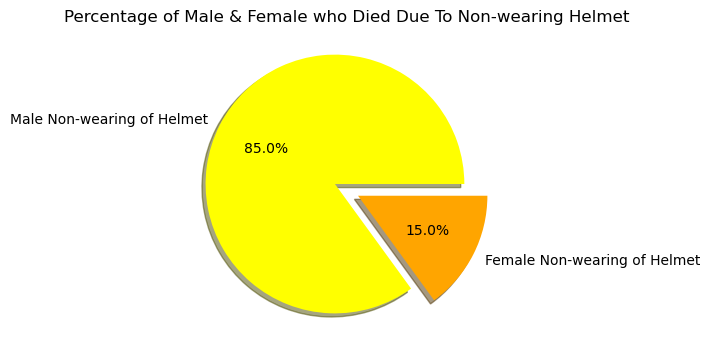

In [61]:
## These two columns we take
dfQ5.iloc[-1:,2:4]

## We need to consider only these two values
dfQ5.iloc[-1,2],dfQ5.iloc[-1,3]

labels = ['Male Non-wearing of Helmet',
          'Female Non-wearing of Helmet']

sizes = [dfQ5.iloc[-1,2], dfQ5.iloc[-1,3]]

colors = ['yellow', 'orange']
explode = (0.1, 0.1,)

plt.figure(figsize=(4,4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Male & Female who Died Due To Non-wearing Helmet')
plt.show()

### 6.The number of accidents happening per state from the year 2003 to 2016.

In [62]:
df3 = pd.read_excel('accidents03-16.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [63]:
df3.shape

(37, 15)

In [64]:
df3.isnull().sum()

States/Uts    0
2003          1
2004          1
2005          1
2006          1
2007          1
2008          1
2009          1
2010          1
2011          1
2012          2
2013          1
2014          0
2015          0
2016          0
dtype: int64

In [65]:
df3

States/Uts     2003     2004     2005     2006      2007  \
0              Andhra Pradesh   8616.0   9343.0   9126.0  11378.0   11885.0   
1           Arunachal Pradesh     65.0     79.0     63.0     87.0      81.0   
2                       Assam   1120.0   1177.0   1420.0   1627.0    1483.0   
3                       Bihar   2138.0   1579.0   1462.0   2315.0    3074.0   
4                Chhattisgarh   1788.0   1892.0   2049.0   2288.0    2496.0   
5                         Goa    207.0    281.0    220.0    290.0     300.0   
6                     Gujarat   4335.0   4671.0   4922.0   5435.0    5958.0   
7                     Haryana   2722.0   3032.0   3010.0   3483.0    3980.0   
8            Himachal Pradesh    507.0    527.0    549.0    577.0     659.0   
9             Jammu & Kashmir    609.0    669.0    660.0    646.0     717.0   
10                  Jharkhand   1576.0   1685.0   1784.0   1784.0    2078.0   
11                  Karnataka   5493.0   5786.0   6093.0   7092.0    7875.0   
12                     Kerala   2650.0   2824.0   2956.0   3390.0    3465.0   
13             Madhya Pradesh   3868.0   4171.0   4620.0   4846.0    5457.0   
14                Maharashtra   8159.0   8555.0   8867.0   9796.0    9802.0   
15                    Manipur    114.0     87.0    115.0    127.0     103.0   
16                  Meghalaya    137.0    108.0    106.0    125.0     107.0   
17                    Mizoram     71.0     40.0     52.0     53.0      44.0   
18                   Nagaland     43.0     42.0     48.0     60.0      74.0   
19                     Odisha   1954.0   2227.0   2279.0   2456.0    2726.0   
20                     Punjab   2352.0   2317.0   2447.0   2724.0    2664.0   
21                  Rajasthan   5050.0   5488.0   5815.0   6252.0    7036.0   
22                     Sikkim     22.0     26.0     53.0     40.0      31.0   
23                 Tamil Nadu   8393.0   8733.0   8843.0  10055.0   11034.0   
24                  Telangana      NaN      NaN      NaN      NaN       NaN   
25                    Tripura    147.0    166.0    188.0    187.0     195.0   
26                Uttarakhand    513.0    617.0    622.0    758.0     773.0   
27              Uttar Pradesh   7038.0   8739.0   8832.0   9592.0   10256.0   
28                West Bengal   1793.0   2246.0   4073.0   3896.0    4232.0   
29  Andaman & Nicobar Islands     12.0     15.0     17.0     18.0      21.0   
30                 Chandigarh    132.0    144.0    133.0    134.0     142.0   
31       Dadra & Nagar Haveli     34.0     46.0     51.0     43.0      61.0   
32                Daman & Diu     19.0     23.0     21.0     24.0      29.0   
33                      Delhi   1730.0   1846.0   1771.0   2129.0    2081.0   
34                Lakshadweep      0.0      0.0      0.0      1.0       0.0   
35                 Puducherry    182.0    176.0    224.0    209.0     242.0   
36                  All India  73589.0  79357.0  83491.0  93917.0  101161.0   

        2008      2009      2010      2011      2012      2013    2014  \
0    12233.0   12676.0   13932.0   13783.0   13560.0   13175.0    7277   
1       90.0     114.0     108.0      96.0      94.0     120.0      92   
2     1641.0    1735.0    1924.0    2015.0    2011.0    2162.0    2169   
3     3514.0    4038.0    4513.0    4676.0    4706.0    4612.0    4505   
4     2600.0    2566.0    2668.0    2659.0    2783.0    3059.0    3570   
5      294.0     298.0     307.0     314.0     271.0     249.0     283   
6     6132.0    6112.0    6648.0    7045.0    6896.0    6786.0    7063   
7     4071.0    4227.0    4168.0    4255.0    3963.0    4095.0    4214   
8      568.0     760.0     766.0     735.0     732.0     736.0     831   
9      694.0     773.0     814.0     846.0     863.0     809.0     886   
10    1829.0    2042.0    2256.0    2279.0    2540.0    2425.0    2259   
11    7848.0    7717.0    8354.0    8091.0    8485.0    8870.0    9485   
12    3632.0    3556.0    3646.0    3896.0    4013.0  

In [66]:
df3.iloc[[36]]

States/Uts     2003     2004     2005     2006      2007      2008  \
36  All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [67]:
df3.drop(index=36)

States/Uts    2003    2004    2005     2006     2007  \
0              Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0   
1           Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0   
2                       Assam  1120.0  1177.0  1420.0   1627.0   1483.0   
3                       Bihar  2138.0  1579.0  1462.0   2315.0   3074.0   
4                Chhattisgarh  1788.0  1892.0  2049.0   2288.0   2496.0   
5                         Goa   207.0   281.0   220.0    290.0    300.0   
6                     Gujarat  4335.0  4671.0  4922.0   5435.0   5958.0   
7                     Haryana  2722.0  3032.0  3010.0   3483.0   3980.0   
8            Himachal Pradesh   507.0   527.0   549.0    577.0    659.0   
9             Jammu & Kashmir   609.0   669.0   660.0    646.0    717.0   
10                  Jharkhand  1576.0  1685.0  1784.0   1784.0   2078.0   
11                  Karnataka  5493.0  5786.0  6093.0   7092.0   7875.0   
12                     Kerala  2650.0  2824.0  2956.0   3390.0   3465.0   
13             Madhya Pradesh  3868.0  4171.0  4620.0   4846.0   5457.0   
14                Maharashtra  8159.0  8555.0  8867.0   9796.0   9802.0   
15                    Manipur   114.0    87.0   115.0    127.0    103.0   
16                  Meghalaya   137.0   108.0   106.0    125.0    107.0   
17                    Mizoram    71.0    40.0    52.0     53.0     44.0   
18                   Nagaland    43.0    42.0    48.0     60.0     74.0   
19                     Odisha  1954.0  2227.0  2279.0   2456.0   2726.0   
20                     Punjab  2352.0  2317.0  2447.0   2724.0   2664.0   
21                  Rajasthan  5050.0  5488.0  5815.0   6252.0   7036.0   
22                     Sikkim    22.0    26.0    53.0     40.0     31.0   
23                 Tamil Nadu  8393.0  8733.0  8843.0  10055.0  11034.0   
24                  Telangana     NaN     NaN     NaN      NaN      NaN   
25                    Tripura   147.0   166.0   188.0    187.0    195.0   
26                Uttarakhand   513.0   617.0   622.0    758.0    773.0   
27              Uttar Pradesh  7038.0  8739.0  8832.0   9592.0  10256.0   
28                West Bengal  1793.0  2246.0  4073.0   3896.0   4232.0   
29  Andaman & Nicobar Islands    12.0    15.0    17.0     18.0     21.0   
30                 Chandigarh   132.0   144.0   133.0    134.0    142.0   
31       Dadra & Nagar Haveli    34.0    46.0    51.0     43.0     61.0   
32                Daman & Diu    19.0    23.0    21.0     24.0     29.0   
33                      Delhi  1730.0  1846.0  1771.0   2129.0   2081.0   
34                Lakshadweep     0.0     0.0     0.0      1.0      0.0   
35                 Puducherry   182.0   176.0   224.0    209.0    242.0   

       2008     2009     2010     2011     2012     2013   2014   2015   2016  
0   12233.0  12676.0  13932.0  13783.0  13560.0  13175.0   7277   7524   7851  
1      90.0    114.0    108.0     96.0     94.0    120.0     92    117    103  
2    1641.0   1735.0   1924.0   2015.0   2011.0   2162.0   2169   2122   2445  
3    3514.0   4038.0   4513.0   4676.0   4706.0   4612.0   4505   4771   4425  
4    2600.0   2566.0   2668.0   2659.0   2783.0   3059.0   3570   3710   3527  
5     294.0    298.0    307.0    314.0    271.0    249.0    283    302    316  
6    6132.0   6112.0   6648.0   7045.0   6896.0   6786.0   7063   7332   7296  
7    4071.0   4227.0   4168.0   4255.0   3963.0   4095.0   4214   4430   4636  
8     568.0    760.0    766.0    735.0    732.0    736.0    831    843   1000  
9     694.0    773.0    814.0    846.0    863.0    809.0    886    749    734  
10   1829.0   2042.0   2256.0   2279.0   2540.0   2425.0   2259   2619   2681  
11   7848.0   7717.0   8354.0   8091.0   8485.0   8870.0   9485   9888  10215  
12   3632.0   3556.0   3646.0   3896.0   4013.0   3972.0   3823   3937   4064  
13   5861.0   6415.0   7044.0   6992.0   7120.0   7565.0   7554   8412   8774  
14  10789.0  10143.0  11188.0  11557.0  119

In [68]:
df3.tail(2)

States/Uts     2003     2004     2005     2006      2007      2008  \
35  Puducherry    182.0    176.0    224.0    209.0     242.0     207.0   
36   All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
35     214.0     224.0     230.0     178.0     223.0     145     229     235  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [69]:
df3.drop(36)

States/Uts    2003    2004    2005     2006     2007  \
0              Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0   
1           Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0   
2                       Assam  1120.0  1177.0  1420.0   1627.0   1483.0   
3                       Bihar  2138.0  1579.0  1462.0   2315.0   3074.0   
4                Chhattisgarh  1788.0  1892.0  2049.0   2288.0   2496.0   
5                         Goa   207.0   281.0   220.0    290.0    300.0   
6                     Gujarat  4335.0  4671.0  4922.0   5435.0   5958.0   
7                     Haryana  2722.0  3032.0  3010.0   3483.0   3980.0   
8            Himachal Pradesh   507.0   527.0   549.0    577.0    659.0   
9             Jammu & Kashmir   609.0   669.0   660.0    646.0    717.0   
10                  Jharkhand  1576.0  1685.0  1784.0   1784.0   2078.0   
11                  Karnataka  5493.0  5786.0  6093.0   7092.0   7875.0   
12                     Kerala  2650.0  2824.0  2956.0   3390.0   3465.0   
13             Madhya Pradesh  3868.0  4171.0  4620.0   4846.0   5457.0   
14                Maharashtra  8159.0  8555.0  8867.0   9796.0   9802.0   
15                    Manipur   114.0    87.0   115.0    127.0    103.0   
16                  Meghalaya   137.0   108.0   106.0    125.0    107.0   
17                    Mizoram    71.0    40.0    52.0     53.0     44.0   
18                   Nagaland    43.0    42.0    48.0     60.0     74.0   
19                     Odisha  1954.0  2227.0  2279.0   2456.0   2726.0   
20                     Punjab  2352.0  2317.0  2447.0   2724.0   2664.0   
21                  Rajasthan  5050.0  5488.0  5815.0   6252.0   7036.0   
22                     Sikkim    22.0    26.0    53.0     40.0     31.0   
23                 Tamil Nadu  8393.0  8733.0  8843.0  10055.0  11034.0   
24                  Telangana     NaN     NaN     NaN      NaN      NaN   
25                    Tripura   147.0   166.0   188.0    187.0    195.0   
26                Uttarakhand   513.0   617.0   622.0    758.0    773.0   
27              Uttar Pradesh  7038.0  8739.0  8832.0   9592.0  10256.0   
28                West Bengal  1793.0  2246.0  4073.0   3896.0   4232.0   
29  Andaman & Nicobar Islands    12.0    15.0    17.0     18.0     21.0   
30                 Chandigarh   132.0   144.0   133.0    134.0    142.0   
31       Dadra & Nagar Haveli    34.0    46.0    51.0     43.0     61.0   
32                Daman & Diu    19.0    23.0    21.0     24.0     29.0   
33                      Delhi  1730.0  1846.0  1771.0   2129.0   2081.0   
34                Lakshadweep     0.0     0.0     0.0      1.0      0.0   
35                 Puducherry   182.0   176.0   224.0    209.0    242.0   

       2008     2009     2010     2011     2012     2013   2014   2015   2016  
0   12233.0  12676.0  13932.0  13783.0  13560.0  13175.0   7277   7524   7851  
1      90.0    114.0    108.0     96.0     94.0    120.0     92    117    103  
2    1641.0   1735.0   1924.0   2015.0   2011.0   2162.0   2169   2122   2445  
3    3514.0   4038.0   4513.0   4676.0   4706.0   4612.0   4505   4771   4425  
4    2600.0   2566.0   2668.0   2659.0   2783.0   3059.0   3570   3710   3527  
5     294.0    298.0    307.0    314.0    271.0    249.0    283    302    316  
6    6132.0   6112.0   6648.0   7045.0   6896.0   6786.0   7063   7332   7296  
7    4071.0   4227.0   4168.0   4255.0   3963.0   4095.0   4214   4430   4636  
8     568.0    760.0    766.0    735.0    732.0    736.0    831    843   1000  
9     694.0    773.0    814.0    846.0    863.0    809.0    886    749    734  
10   1829.0   2042.0   2256.0   2279.0   2540.0   2425.0   2259   2619   2681  
11   7848.0   7717.0   8354.0   8091.0   8485.0   8870.0   9485   9888  10215  
12   3632.0   3556.0   3646.0   3896.0   4013.0   3972.0   3823   3937   4064  
13   5861.0   6415.0   7044.0   6992.0   7120.0   7565.0   7554   8412   8774  
14  10789.0  10143.0  11188.0  11557.0  119

In [70]:
df3.tail(2)

States/Uts     2003     2004     2005     2006      2007      2008  \
35  Puducherry    182.0    176.0    224.0    209.0     242.0     207.0   
36   All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
35     214.0     224.0     230.0     178.0     223.0     145     229     235  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [71]:
## Print all the NAN value rows

df3[df3.isnull().any(axis=1)]

States/Uts  2003  2004  2005  2006  2007  2008  2009  2010  2011  2012  \
24    Telangana   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
34  Lakshadweep   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   NaN   

    2013  2014  2015  2016  
24   NaN  6316  6569  6617  
34   0.0     0     0     1

In [72]:
Total_states = df3['States/Uts'].drop(36).count()
Total_states

36

In [73]:
mean_2003 = (df3.iloc[:36,1].sum()/Total_states).round()
mean_2003

2044.0

In [74]:
df3.head(2)

States/Uts    2003    2004    2005     2006     2007     2008  \
0     Andhra Pradesh  8616.0  9343.0  9126.0  11378.0  11885.0  12233.0   
1  Arunachal Pradesh    65.0    79.0    63.0     87.0     81.0     90.0   

      2009     2010     2011     2012     2013  2014  2015  2016  
0  12676.0  13932.0  13783.0  13560.0  13175.0  7277  7524  7851  
1    114.0    108.0     96.0     94.0    120.0    92   117   103

In [69]:
mean_2004 = (df3.iloc[:36,2].sum()/Total_states).round()
mean_2004

2204.0

In [ ]:
df3['2004'] = df3['2004'].replace(np.nan , mean_2004)

In [ ]:
df3['2004'] = df3['2004'].replace(79357, df3.iloc[:36,2].sum().round())

In [70]:
mean_2005 = (df3.iloc[:36,3].sum()/Total_states).round()
mean_2005

2319.0

In [ ]:
df3['2005'] = df3['2005'].replace(np.nan , mean_2005)

In [ ]:
df3['2005'] = df3['2005'].replace(83491, df3.iloc[:36,3].sum().round())

In [71]:
mean_2006 = (df3.iloc[:36,4].sum()/Total_states).round()
mean_2006

2609.0

In [74]:
mean_2007 = (df3.iloc[:36,5].sum()/Total_states).round()
mean_2007

2810.0

In [77]:
mean_2008 = (df3.iloc[:36,6].sum()/Total_states).round()
mean_2008

2961.0

In [79]:
mean_2009 = (df3.iloc[:36,7].sum()/Total_states).round()
mean_2009

3083.0

In [81]:
mean_2010 = (df3.iloc[:36,8].sum()/Total_states).round()
mean_2010

3321.0

In [83]:
mean_2011 = (df3.iloc[:36,9].sum()/Total_states).round()
mean_2011

3378.0

In [85]:
mean_2012 = (df3.iloc[:36,10].sum()/Total_states).round()
mean_2012


3419.0

In [87]:
mean_2013 = (df3.iloc[:36,11].sum()/Total_states).round()
mean_2013

3405.0

In [89]:
df3.tail(2)

States/Uts     2003     2004     2005     2006      2007      2008  \
35  Puducherry    182.0    176.0    224.0    209.0     242.0     207.0   
36   All India  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0   

        2009      2010      2011      2012      2013    2014    2015    2016  
35     214.0     224.0     230.0     178.0     223.0     145     229     235  
36  110993.0  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

In [90]:
df3.iloc[[-1], 1:15]

2003     2004     2005     2006      2007      2008      2009  \
36  73589.0  79357.0  83491.0  93917.0  101161.0  106591.0  110993.0   

        2010      2011      2012      2013    2014    2015    2016  
36  119558.0  121618.0  123093.0  122589.0  125828  131726  136071

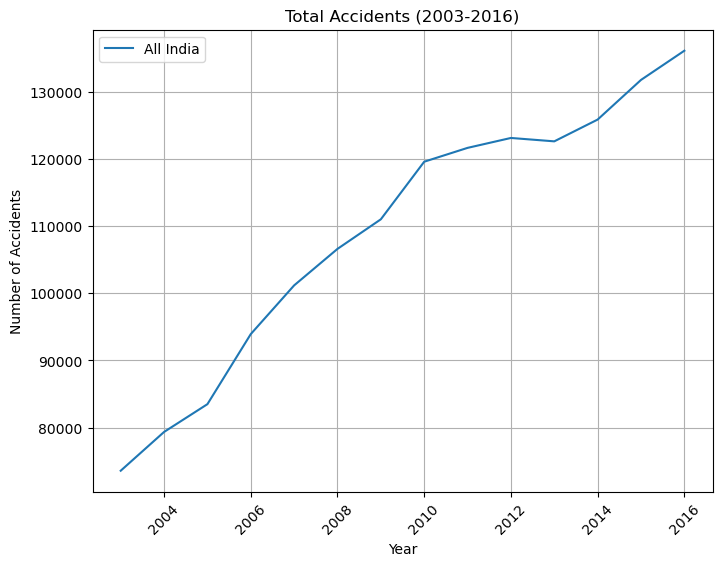

In [91]:
## Now we don't have any null value in this dataset

df3.isnull().sum()

# Filter out only the rows which we need (years and total accidents)
selected_rows = df3.iloc[[-1], 1:15]

# Plotting
plt.figure(figsize=(8, 6))

plt.plot(selected_rows.columns, selected_rows.iloc[0], label='All India')

plt.title('Total Accidents (2003-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 7.Number of ACCIDENTS for 1,2,3,4 LANE per 1L population of resp. state.

In [92]:
df4 = pd.read_csv('laneAccidents.csv')

In [93]:
df4.shape

(37, 27)

In [94]:
df4.tail(2)

S.No    State/UT  Single Lane - Accident - 2014  \
35      36  Puducherry                          525.0   
36  Total       Total                        207725.0   

    Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
35                                    42.068892                         43.0   
36                                    17.155234                      60336.0   

    Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
35                                   3.445643                         393.0   
36                                   4.982925                      217356.0   

    Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
35                                   31.491571                        567.0   
36                                   17.950622                     193188.0   

    Two Lanes - Accident - 2014 per 1L people  Two Lanes - Killed - 2014  \
35                                  45.434403                      108.0   
36                                  15.954677                    53033.0   

    Two Lanes - Killed - 2014 per 1L people  Two Lanes - Injured - 2014  \
35                                 8.654172                       930.0   
36                                 4.379798                    198273.0   

    Two Lanes - Injured - 2014 per 1L people  \
35                                 74.522037   
36                                 16.374628   

    3 Lanes or more w.o Median - Accident - 2014  \
35                                           0.0   
36                                       22368.0   

    3 Lanes or more w.o Median - Accident - 2014 per 1L people  \
35                                            0.00000            
36                                            1.84729            

    3 Lanes or more w.o Median - Killed - 2014  \
35                                         0.0   
36                                      5425.0   

    3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
35                                           0.000000          
36                                           0.448031          

    3 Lanes or more w.o Median - Injured - 2014  \
35                                          0.0   
36                                      14387.0   

    3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
35                                           0.000000           
36                                           1.188169           

    4 Lanes with Median - Accident - 2014  \
35                                   19.0   
36                                57480.0   

    4 Lanes with Median - Accident - 2014 per 1L people  \
35                                           1.522493     
36                                           4.747059     

    4 Lanes with Median - Killed - 2014  \
35                                  0.0   
36                              19206.0   

    4 Lanes with Median - Killed - 2014 per 1L people  \
35                                           0.000000   
36                                           1.586152   

    4 Lanes with Median - Injured - 2014  \
35                                   0.0   
36                               55175.0   

    4 Lanes with Median - Injured - 2014 per 1L people  Population  
35                                           0.000000      1247953  
36                                           4.556698   1210854977

In [95]:
df4.isnull().sum()

S.No                                                          0
State/UT                                                      0
Single Lane - Accident - 2014                                 1
Single Lane - Accident - 2014 per 1L people                   1
Single Lane - Killed - 2014                                   1
Single Lane - Killed - 2014 per 1L people                     1
Single Lane - Injured - 2014                                  1
Single Lane - Injured - 2014 per 1L people                    1
Two Lanes - Accident - 2014                                   1
Two Lanes - Accident - 2014 per 1L people                     1
Two Lanes - Killed - 2014                                     1
Two Lanes - Killed - 2014 per 1L people                       1
Two Lanes - Injured - 2014                                    1
Two Lanes - Injured - 2014 per 1L people                      1
3 Lanes or more w.o Median - Accident - 2014                  1
3 Lanes or more w.o Median - Accident - 

In [99]:
df4_clean_data = df4.drop(index=33)

In [100]:
df4_clean_data.shape

(36, 27)

In [101]:
df4_clean_data

S.No                   State/UT  Single Lane - Accident - 2014  \
0        1             Andhra Pradesh                         8634.0   
1        2          Arunachal Pradesh                           90.0   
2        3                      Assam                         3888.0   
3        4                      Bihar                         3731.0   
4        5               Chhattisgarh                         7961.0   
5        6                        Goa                         2523.0   
6        7                    Gujarat                        10978.0   
7        8                    Haryana                         4090.0   
8        9           Himachal Pradesh                         1183.0   
9       10            Jammu & Kashmir                         3761.0   
10      11                  Jharkhand                         2449.0   
11      12                  Karnataka                        26467.0   
12      13                     Kerala                         7340.0   
13      14             Madhya Pradesh                        28501.0   
14      15                Maharashtra                        23235.0   
15      16                    Manipur                          423.0   
16      17                  Meghalaya                          308.0   
17      18                    Mizoram                           57.0   
18      19                   Nagaland                          305.0   
19      20                     Orissa                         5339.0   
20      21                     Punjab                         2930.0   
21      22                  Rajasthan                        11874.0   
22      23                     Sikkim                          203.0   
23      24                 Tamil Nadu                        20499.0   
24      25                  Telangana                         6353.0   
25      26                    Tripura                          462.0   
26      27                Uttarakhand                          742.0   
27      28              Uttar Pradesh                        14955.0   
28      29                West Bengal                         7654.0   
29      30  Andaman & Nicobar Islands                           99.0   
30      31                 Chandigarh                          131.0   
31      32       Dadra & Nagar Haveli                           21.0   
32      33                Daman & Diu                           13.0   
34      35                Lakshadweep                            1.0   
35      36                 Puducherry                          525.0   
36  Total                      Total                        207725.0   

    Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
0                                     16.473750                       2958.0   
1                                      6.504173                         60.0   
2                                     12.459312                       1217.0   
3                                      3.584073                       1815.0   
4                                     31.164370                       2244.0   
5                                    172.980607                        187.0   
6                                     18.163560                       3101.0   
7                                     16.133192                       1565.0   
8                                     17.233337                        528.0   
9                                     29.988912                        548.0   
10                                     7.423882                       1051.0   
11                                    43.320847                       5804.0   
12                                    21.972061                       1137.0   
13                                    39.243084                       4423.0   
14                                    20.676430                       5312.0   
15                                    14.811993              

In [102]:
df4.iloc[:,1]

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Orissa
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

In [103]:
## Code for plot 

states = df4_clean_data.iloc[:, 1] 
columns = ['Single Lane - Accident - 2014 per 1L people', 
           'Two Lanes - Accident - 2014 per 1L people',
           '3 Lanes or more w.o Median - Accident - 2014 per 1L people',
           '4 Lanes with Median - Accident - 2014 per 1L people']

labels = ['Single Lane', 'Two Lane', 'Three Lane', 'Four Lane']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

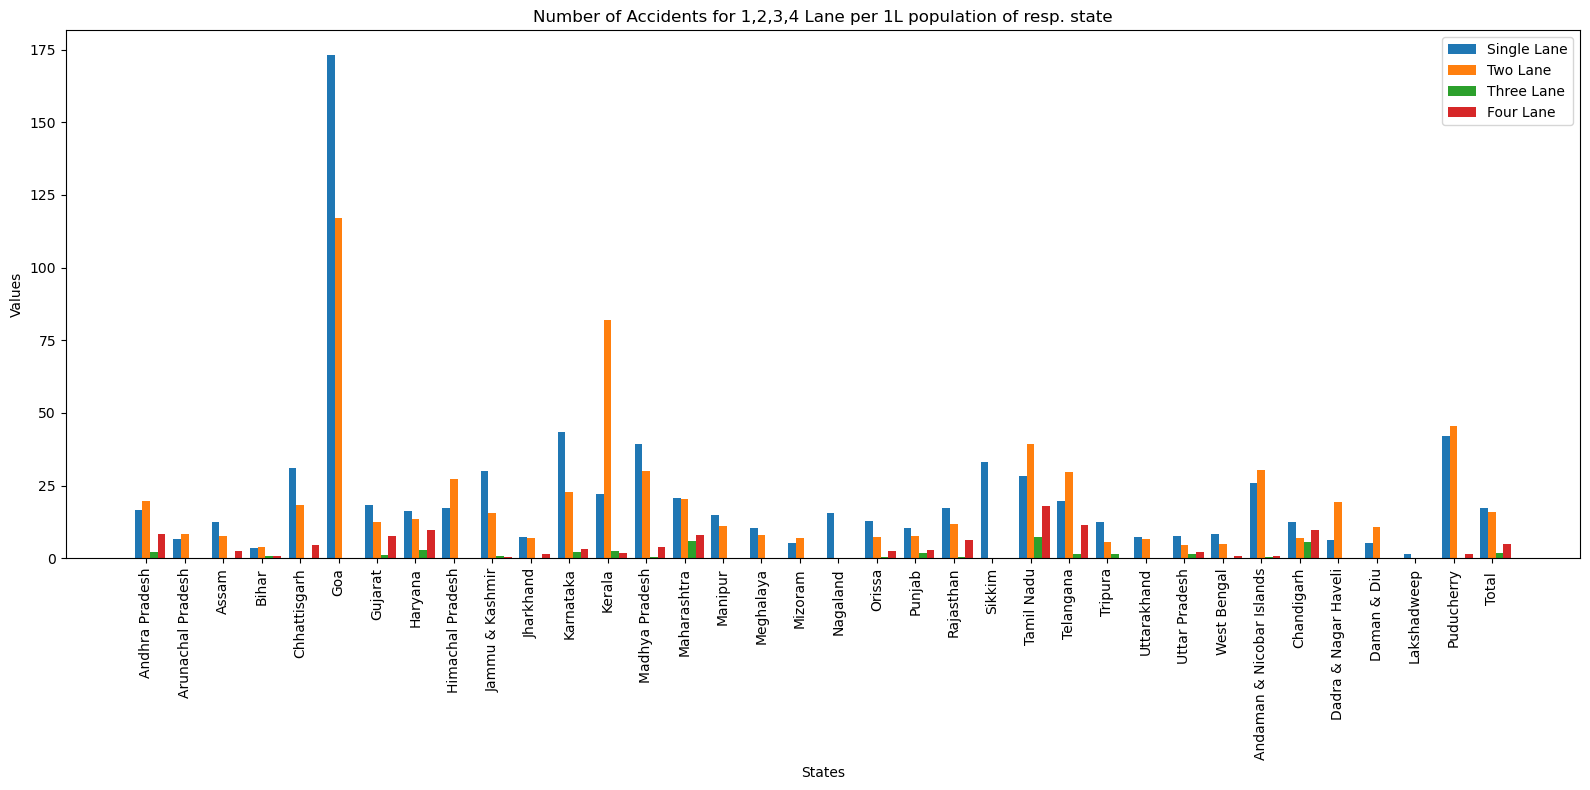

In [104]:
# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=labels[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of Accidents for 1,2,3,4 Lane per 1L population of resp. state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [105]:
df4.tail(2)

S.No    State/UT  Single Lane - Accident - 2014  \
35      36  Puducherry                          525.0   
36  Total       Total                        207725.0   

    Single Lane - Accident - 2014 per 1L people  Single Lane - Killed - 2014  \
35                                    42.068892                         43.0   
36                                    17.155234                      60336.0   

    Single Lane - Killed - 2014 per 1L people  Single Lane - Injured - 2014  \
35                                   3.445643                         393.0   
36                                   4.982925                      217356.0   

    Single Lane - Injured - 2014 per 1L people  Two Lanes - Accident - 2014  \
35                                   31.491571                        567.0   
36                                   17.950622                     193188.0   

    Two Lanes - Accident - 2014 per 1L people  Two Lanes - Killed - 2014  \
35                                  45.434403                      108.0   
36                                  15.954677                    53033.0   

    Two Lanes - Killed - 2014 per 1L people  Two Lanes - Injured - 2014  \
35                                 8.654172                       930.0   
36                                 4.379798                    198273.0   

    Two Lanes - Injured - 2014 per 1L people  \
35                                 74.522037   
36                                 16.374628   

    3 Lanes or more w.o Median - Accident - 2014  \
35                                           0.0   
36                                       22368.0   

    3 Lanes or more w.o Median - Accident - 2014 per 1L people  \
35                                            0.00000            
36                                            1.84729            

    3 Lanes or more w.o Median - Killed - 2014  \
35                                         0.0   
36                                      5425.0   

    3 Lanes or more w.o Median - Killed - 2014 per 1L people  \
35                                           0.000000          
36                                           0.448031          

    3 Lanes or more w.o Median - Injured - 2014  \
35                                          0.0   
36                                      14387.0   

    3 Lanes or more w.o Median - Injured - 2014 per 1L people  \
35                                           0.000000           
36                                           1.188169           

    4 Lanes with Median - Accident - 2014  \
35                                   19.0   
36                                57480.0   

    4 Lanes with Median - Accident - 2014 per 1L people  \
35                                           1.522493     
36                                           4.747059     

    4 Lanes with Median - Killed - 2014  \
35                                  0.0   
36                              19206.0   

    4 Lanes with Median - Killed - 2014 per 1L people  \
35                                           0.000000   
36                                           1.586152   

    4 Lanes with Median - Injured - 2014  \
35                                   0.0   
36                               55175.0   

    4 Lanes with Median - Injured - 2014 per 1L people  Population  
35                                           0.000000      1247953  
36                                           4.556698   1210854977

### 8.Number of people INJURED for 1,2,3,4 type of lane per 1L population of resp. State.

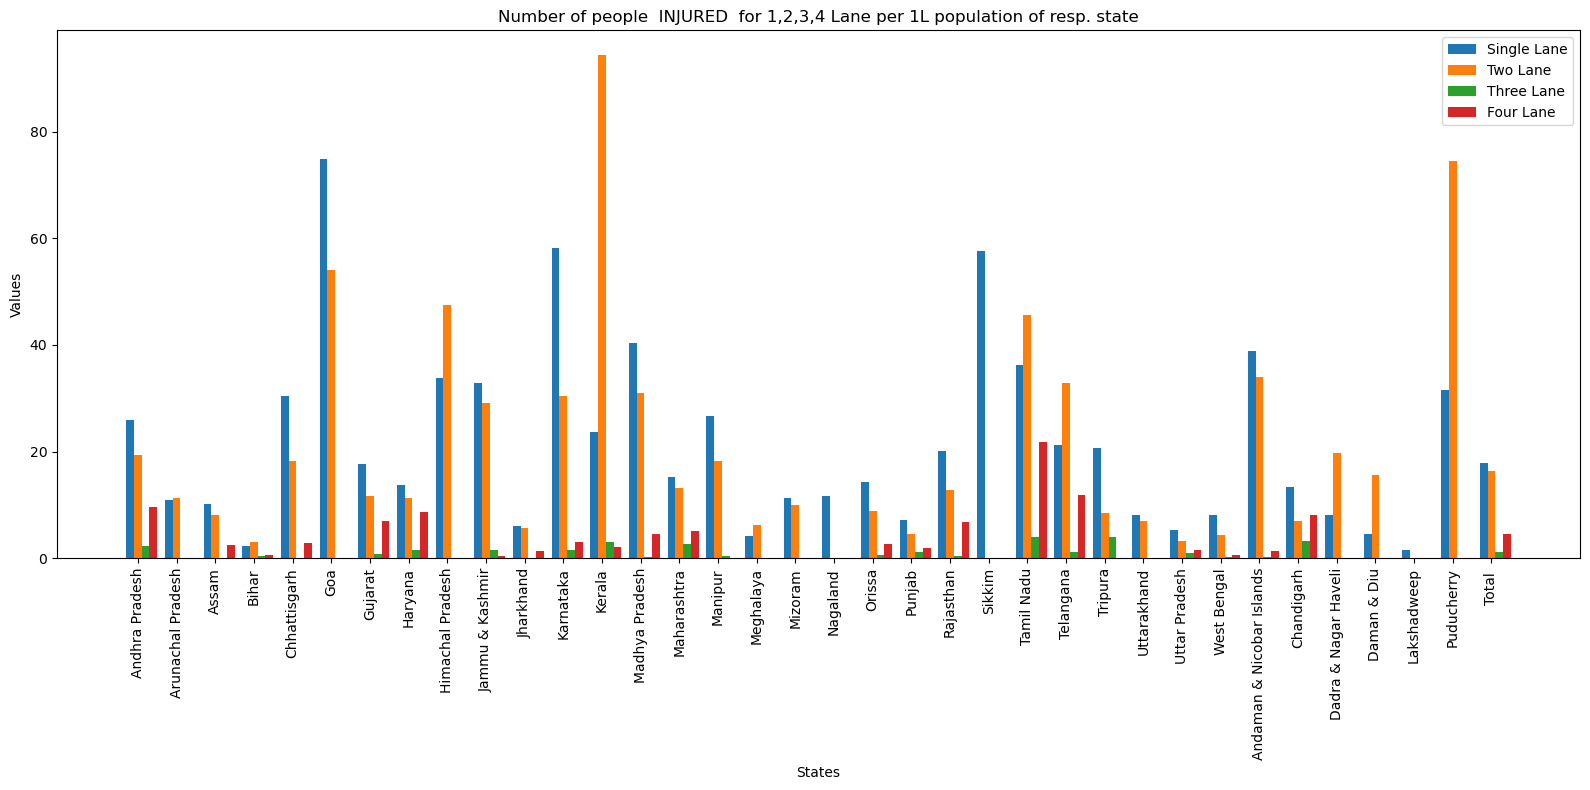

In [106]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['Single Lane - Injured - 2014 per 1L people', 
           'Two Lanes - Injured - 2014 per 1L people',
           '3 Lanes or more w.o Median - Injured - 2014 per 1L people',
           '4 Lanes with Median - Injured - 2014 per 1L people']

labels = ['Single Lane', 'Two Lane', 'Three Lane', 'Four Lane']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)
# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=labels[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of people  INJURED  for 1,2,3,4 Lane per 1L population of resp. state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 9.Number of people KILLED for 1,2,3,4 LANES per 1L population of resp. States.

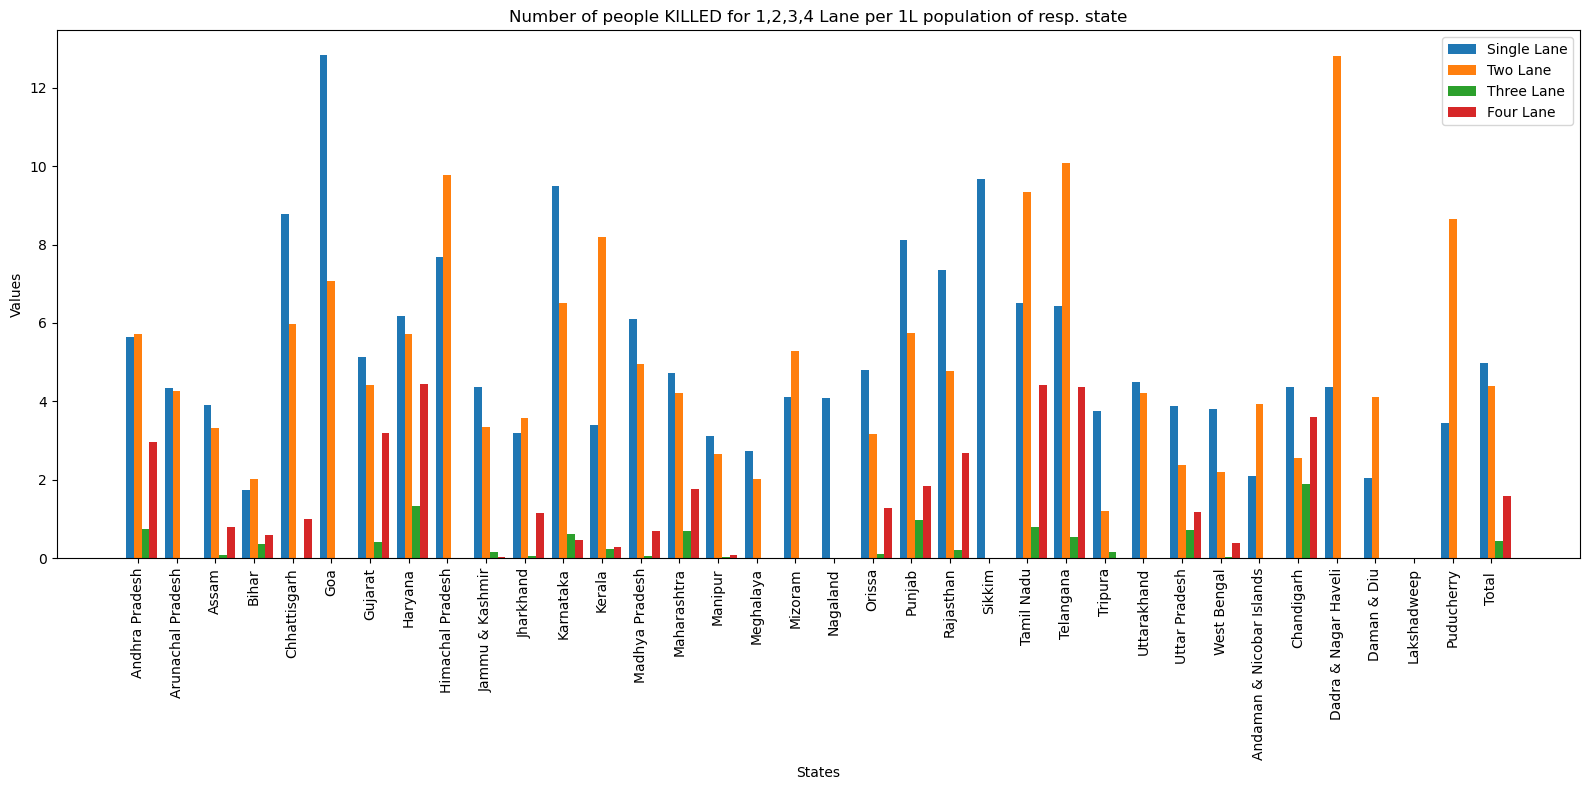

In [107]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['Single Lane - Killed - 2014 per 1L people', 
           'Two Lanes - Killed - 2014 per 1L people',
           '3 Lanes or more w.o Median - Killed - 2014 per 1L people',
           '4 Lanes with Median - Killed - 2014 per 1L people']

labels = ['Single Lane', 'Two Lane', 'Three Lane', 'Four Lane']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=labels[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of people KILLED for 1,2,3,4 Lane per 1L population of resp. state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 10.Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population.

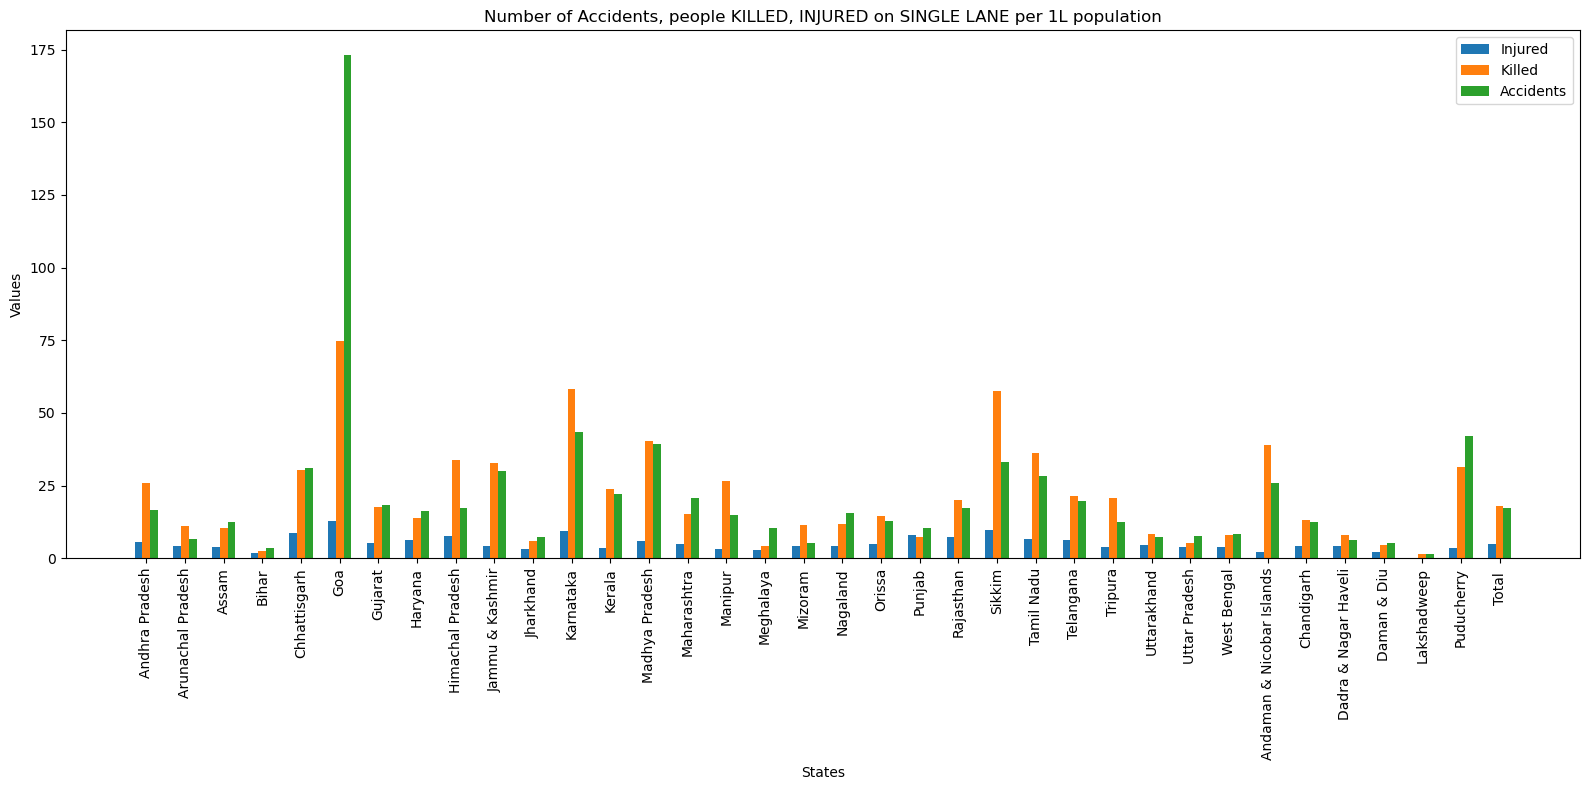

In [108]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['Single Lane - Killed - 2014 per 1L people', 
           'Single Lane - Injured - 2014 per 1L people',
           'Single Lane - Accident - 2014 per 1L people']

label = ['Injured','Killed','Accidents']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of Accidents, people KILLED, INJURED on SINGLE LANE per 1L population')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 11.Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population.

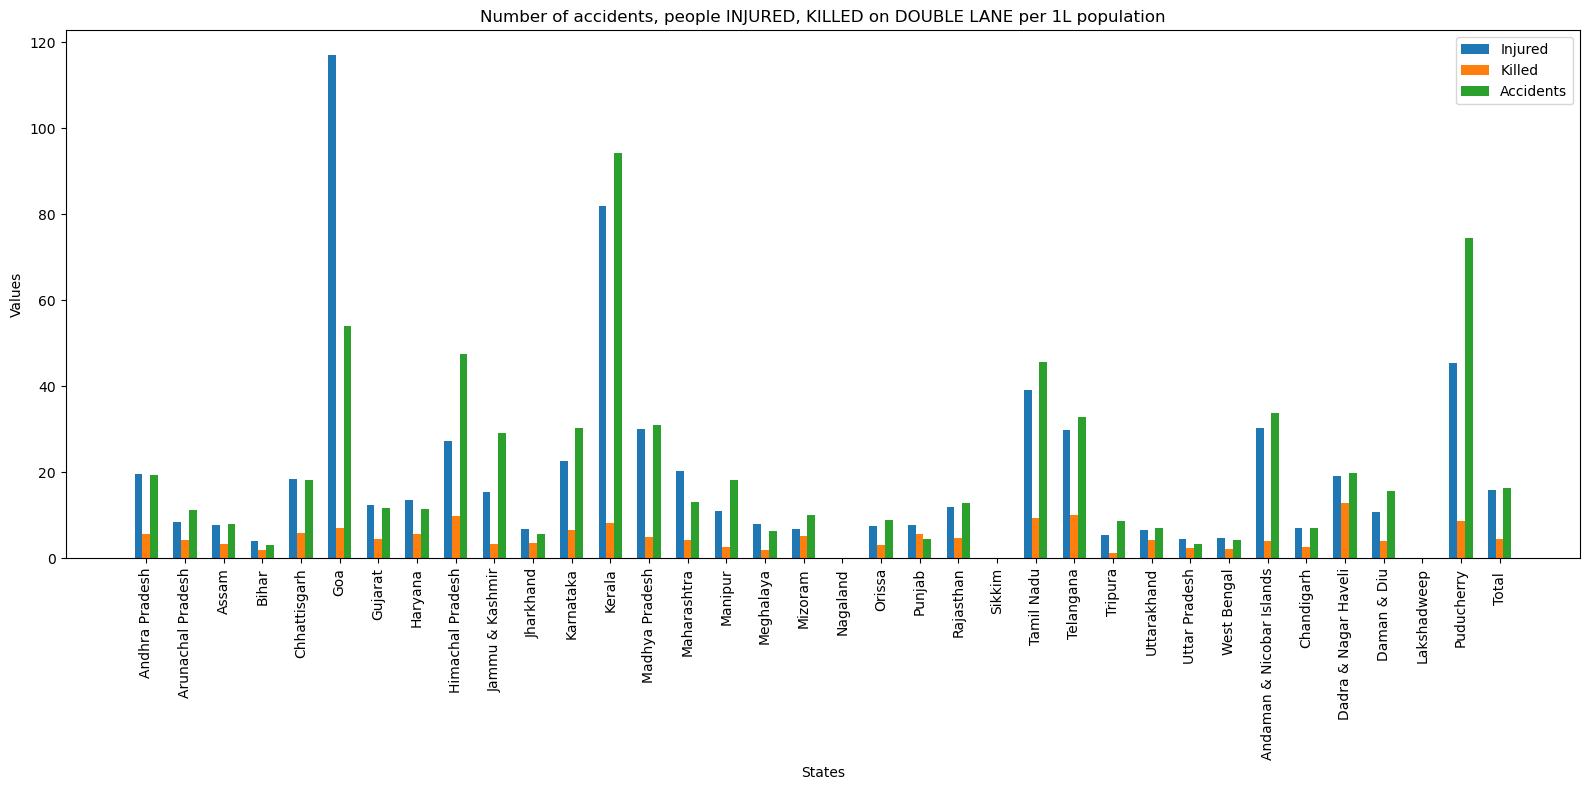

In [109]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['Two Lanes - Accident - 2014 per 1L people',                                                      
           'Two Lanes - Killed - 2014 per 1L people',                                                       
           'Two Lanes - Injured - 2014 per 1L people']

label = ['Injured','Killed','Accidents']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of accidents, people INJURED, KILLED on DOUBLE LANE per 1L population')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 12.Number of accidents, people INJURED, KILLED on THREE LANE per 1L population

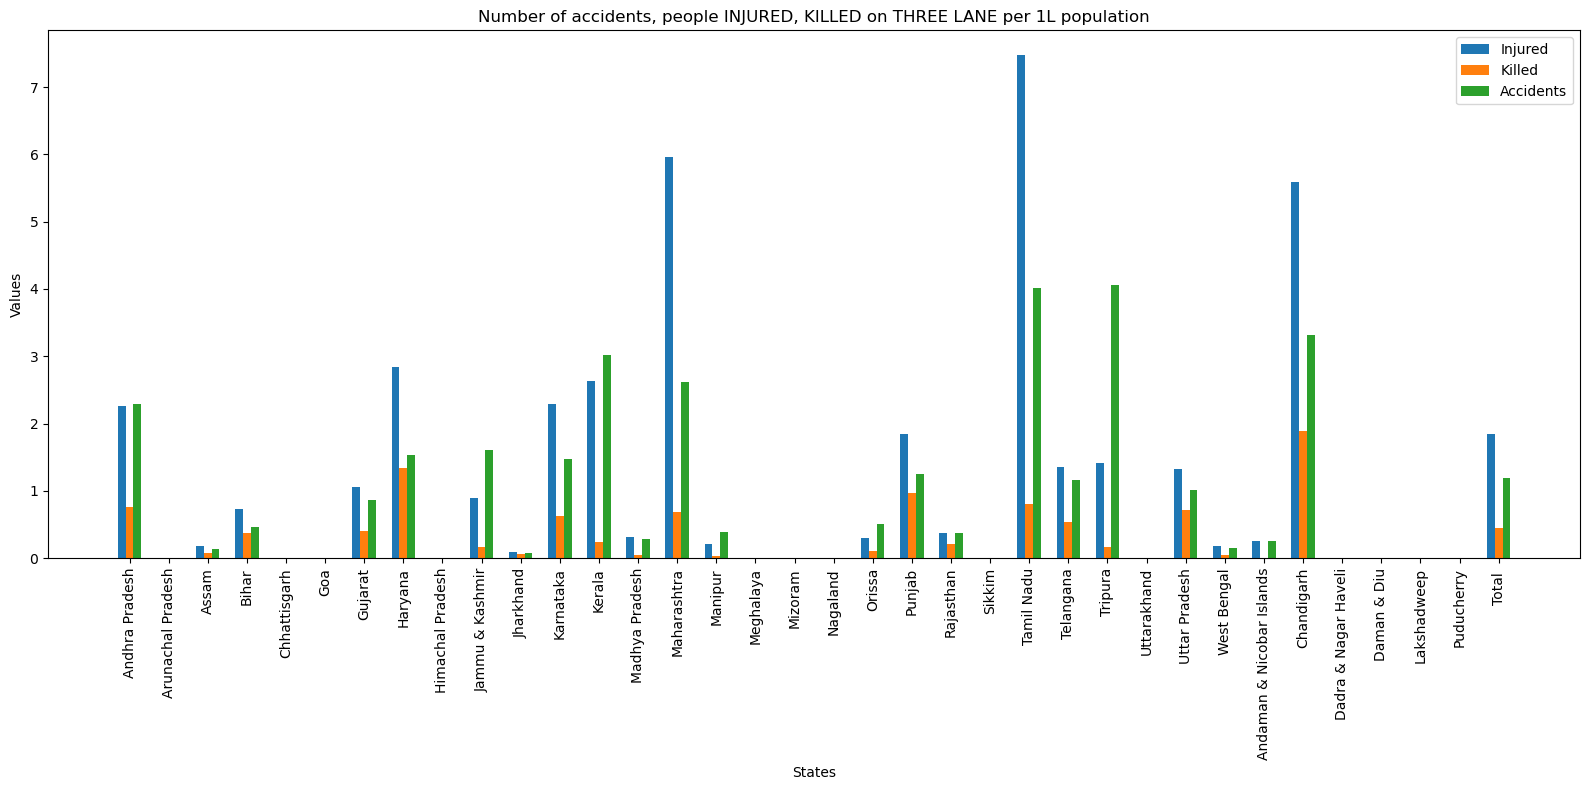

In [110]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['3 Lanes or more w.o Median - Accident - 2014 per 1L people',                                                      
           '3 Lanes or more w.o Median - Killed - 2014 per 1L people',                                                       
           '3 Lanes or more w.o Median - Injured - 2014 per 1L people']

label = ['Injured','Killed','Accidents']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of accidents, people INJURED, KILLED on THREE LANE per 1L population')
## Code for Plot')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 13.Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population.

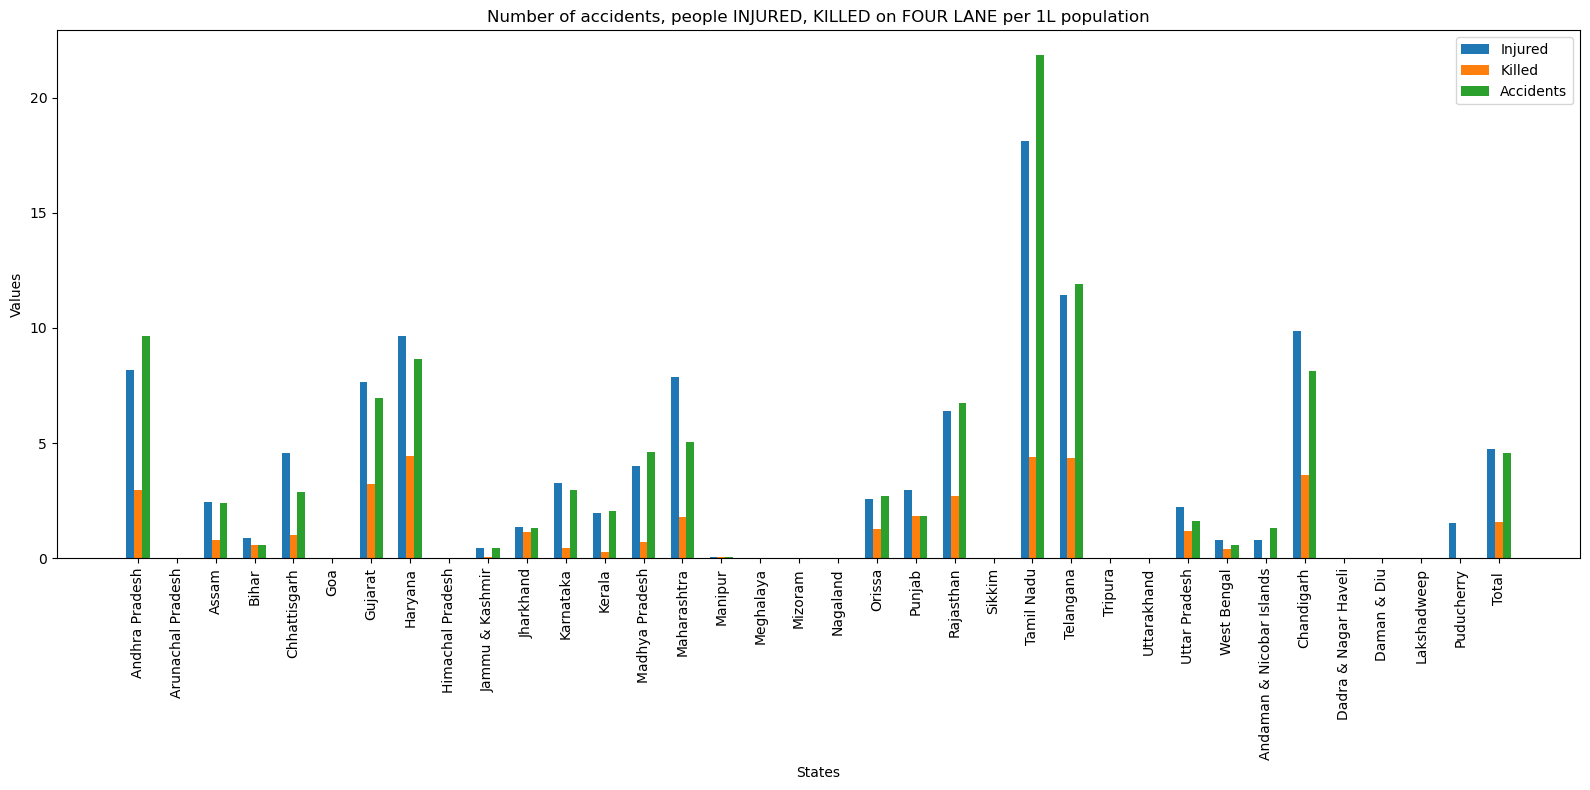

In [111]:
## Code for Plot
states = df4_clean_data.iloc[:, 1] 
columns = ['4 Lanes with Median - Accident - 2014 per 1L people',                                                      
           '4 Lanes with Median - Killed - 2014 per 1L people',                                                       
           '4 Lanes with Median - Injured - 2014 per 1L people']

label = ['Injured','Killed','Accidents']

# Transpose the data to align it properly
data = df4_clean_data[columns].T.values

# Create DataFrame
df4_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df4_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of accidents, people INJURED, KILLED on FOUR LANE per 1L population')
## Code for Plot')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 14.Total Number of INJURED, KILLED, ROAD ACCIDENTS irrespective of lanes per 1L population of resp. State.

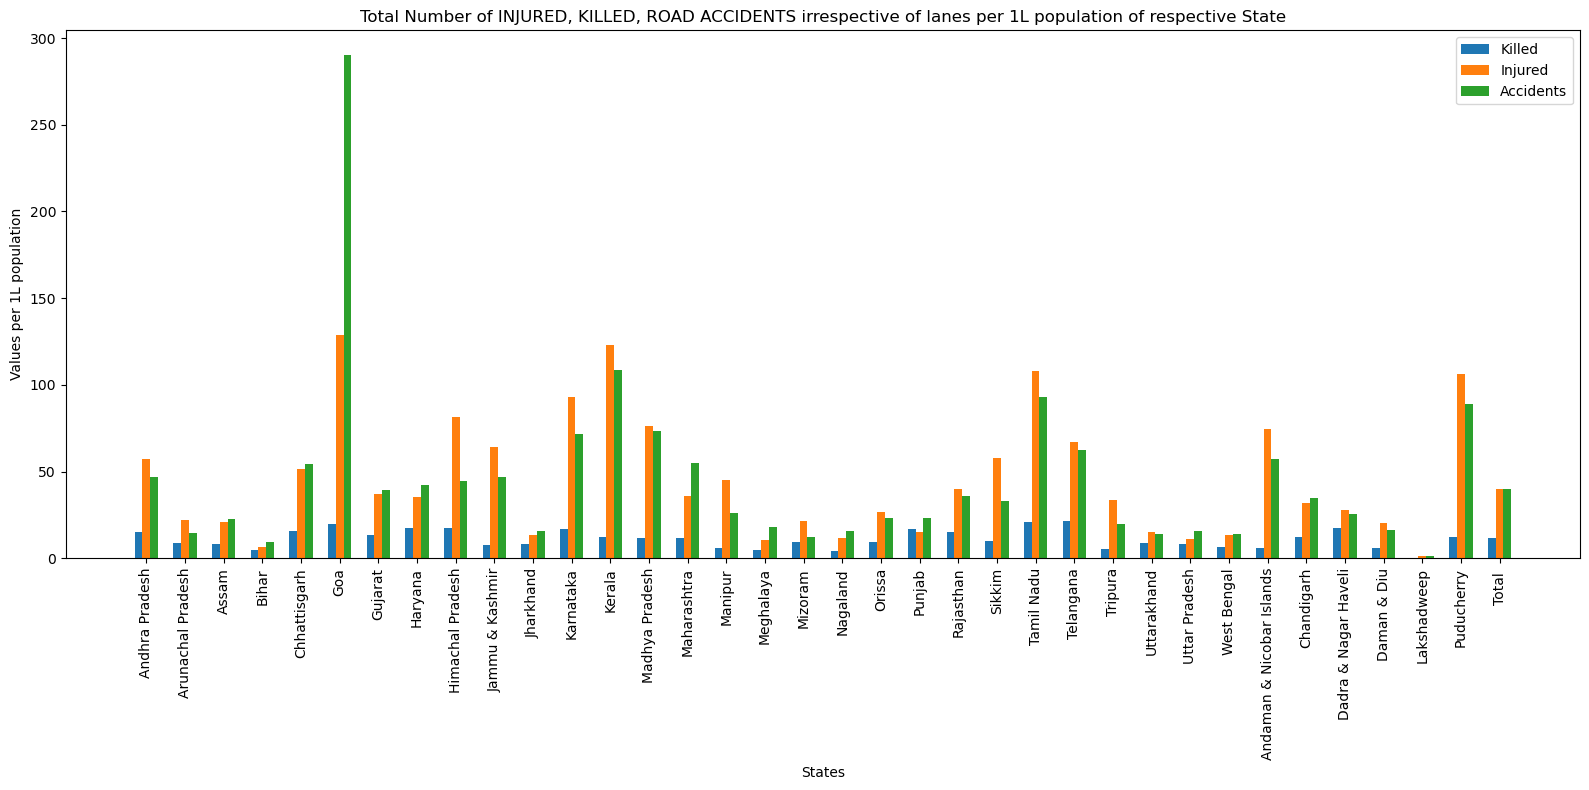

In [112]:
states = df4_clean_data.iloc[:, 1] 
columns = [
    'Single Lane - Killed - 2014 per 1L people', 
    'Single Lane - Injured - 2014 per 1L people',
    'Single Lane - Accident - 2014 per 1L people',
    'Two Lanes - Accident - 2014 per 1L people',                                                      
    'Two Lanes - Killed - 2014 per 1L people',                                                       
    'Two Lanes - Injured - 2014 per 1L people',
    '3 Lanes or more w.o Median - Accident - 2014 per 1L people',                                                      
    '3 Lanes or more w.o Median - Killed - 2014 per 1L people',                                                       
    '3 Lanes or more w.o Median - Injured - 2014 per 1L people',
    '4 Lanes with Median - Accident - 2014 per 1L people',                                                      
    '4 Lanes with Median - Killed - 2014 per 1L people',                                                       
    '4 Lanes with Median - Injured - 2014 per 1L people'
]

# Calculate total numbers irrespective of lanes
total_killed = df4_clean_data[[col for col in columns if 'Killed' in col]].sum(axis=1)
total_injured = df4_clean_data[[col for col in columns if 'Injured' in col]].sum(axis=1)
total_accidents = df4_clean_data[[col for col in columns if 'Accident' in col]].sum(axis=1)

# Create DataFrame for the plot
df_totals = pd.DataFrame({
    'States': states,
    'Killed': total_killed,
    'Injured': total_injured,
    'Accidents': total_accidents
})

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each category separately
plt.bar(x - width, df_totals['Killed'], width=width, label='Killed')
plt.bar(x, df_totals['Injured'], width=width, label='Injured')
plt.bar(x + width, df_totals['Accidents'], width=width, label='Accidents')

plt.xlabel('States')
plt.ylabel('Values per 1L population')
plt.title('Total Number of INJURED, KILLED, ROAD ACCIDENTS irrespective of lanes per 1L population of respective State')
plt.xticks(x, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### 15.Number of people KILLED for each different REASON per 1L population of that state.

In [113]:
df5 = pd.read_csv('reasonOfAccident.csv')

In [114]:
df5.shape

(37, 63)

In [115]:
df5.tail(2)

Sl. No  States/UTs  Fault of Driver-Total No. of Road Accidents - 2014  \
35      36  Puducherry                                             1111.0    
36  Total       Total                                            378992.0    

    Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
35                                          89.025789                  
36                                          31.299537                  

    Fault of Driver-Number of Persons-Killed - 2014  \
35                                              151   
36                                           102878   

    Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
35                                          12.099815               
36                                           8.496311               

    Fault of Driver-Number of Persons-Injured - 2014  \
35                                            1323.0   
36                                          393340.0   

    Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
35                                         106.013608                
36                                          32.484485                

    Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
35                                                0.0                      
36                                            20876.0                      

    Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
35                                           0.000000                                    
36                                           1.724071                                    

    Fault of Driver of other vehicles-Number of Persons-Killed - 2014  \
35                                                  0                   
36                                               5295                   

    Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people  \
35                                           0.000000                                 
36                                           0.437294                                 

    Fault of Driver of other vehicles-Number of Persons-Injured - 2014  \
35                                                0.0                    
36                                            16148.0                    

    Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people  \
35                                           0.000000                                  
36                                           1.333603                                  

    Fault of Pedestrian-Total No. of Road Accidents - 2014  \
35                                                0.0        
36                                             7191.0        

    Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people  \
35                                           0.000000                      
36                                           0.593878                      

    Fault of Pedestrian-Number of Persons-Killed - 2014  \
35                                                  0     
36                                               2555     

    Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people  \
35                                           0.000000                   
36                                           0.211008                   

    Fault of Pedestrian-Number of Persons-Injured - 2014  \
35                                                0.0      
36                                             6331.0      

    Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people  \
35                                           0.000000                    
36                                           0.522854                    

    Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014  \
35                             

In [116]:
df5.isnull().sum()

Sl. No                                                                                   0
States/UTs                                                                               0
Fault of Driver-Total No. of Road Accidents - 2014                                       1
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people                         1
Fault of Driver-Number of Persons-Killed - 2014                                          0
Fault of Driver-Number of Persons-Killed - 2014 per 1L people                            0
Fault of Driver-Number of Persons-Injured - 2014                                         1
Fault of Driver-Number of Persons-Injured - 2014 per 1L people                           1
Fault of Driver of other vehicles-Total No. of Road Accidents - 2014                     1
Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people       1
Fault of Driver of other vehicles-Number of Persons-Killed - 2014                        0

In [117]:
df5[df5.isnull().any(axis=1)]

Sl. No States/UTs  Fault of Driver-Total No. of Road Accidents - 2014  \
33     34     Delhi                                                 NaN    

    Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
33                                                NaN                  

    Fault of Driver-Number of Persons-Killed - 2014  \
33                                              856   

    Fault of Driver-Number of Persons-Killed - 2014 per 1L people  \
33                                           5.098898               

    Fault of Driver-Number of Persons-Injured - 2014  \
33                                               NaN   

    Fault of Driver-Number of Persons-Injured - 2014 per 1L people  \
33                                                NaN                

    Fault of Driver of other vehicles-Total No. of Road Accidents - 2014  \
33                                                NaN                      

    Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people  \
33                                                NaN                                    

    Fault of Driver of other vehicles-Number of Persons-Killed - 2014  \
33                                                 13                   

    Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people  \
33                                           0.077437                                 

    Fault of Driver of other vehicles-Number of Persons-Injured - 2014  \
33                                                NaN                    

    Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people  \
33                                                NaN                                  

    Fault of Pedestrian-Total No. of Road Accidents - 2014  \
33                                                NaN        

    Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people  \
33                                                NaN                      

    Fault of Pedestrian-Number of Persons-Killed - 2014  \
33                                                  0     

    Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people  \
33                                                0.0                   

    Fault of Pedestrian-Number of Persons-Injured - 2014  \
33                                                NaN      

    Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people  \
33                                                NaN                    

    Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014  \
33                                                NaN                         

    Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people  \
33                                                NaN                                       

    Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014  \
33                                                  7                      

    Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people  \
33                                           0.041697                                    

    Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014  \
33                                                NaN                       

    Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people  \
33                                                NaN                                     

    Defect in Road Condition-Total No. of Road Accidents - 2014  \
33                                                NaN             

    Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people  \
33                                                NaN                           

    Defect in Road Condition-Number of Persons-Killed - 2014  \
33                       

In [118]:
df5_clean_data = df5.drop(index=33)

In [119]:
df5_clean_data.shape

(36, 63)

In [120]:
df5_clean_data

Sl. No             States/UTs  \
0        1         Andhra Pradesh   
1        2      Arunachal Pradesh   
2        3                  Assam   
3        4                  Bihar   
4        5           Chhattisgarh   
5        6                    Goa   
6        7                Gujarat   
7        8                Haryana   
8        9       Himachal Pradesh   
9       10        Jammu & Kashmir   
10      11              Jharkhand   
11      12              Karnataka   
12      13                 Kerala   
13      14         Madhya Pradesh   
14      15            Maharashtra   
15      16                Manipur   
16      17              Meghalaya   
17      18                Mizoram   
18      19               Nagaland   
19      20                 Odisha   
20      21                 Punjab   
21      22              Rajasthan   
22      23                 Sikkim   
23      24             Tamil Nadu   
24      25              Telangana   
25      26                Tripura   
26      27            Uttarakhand   
27      28          Uttar Pradesh   
28      29            West Bengal   
29      30  Andaman & Nicobar Is.   
30      31             Chandigarh   
31      32   Dadra & Nagar Haveli   
32      33            Daman & Diu   
34      35            Lakshadweep   
35      36             Puducherry   
36  Total                  Total    

    Fault of Driver-Total No. of Road Accidents - 2014  \
0                                             21359.0    
1                                                30.0    
2                                              6895.0    
3                                              5008.0    
4                                              9108.0    
5                                              3795.0    
6                                             18945.0    
7                                              8208.0    
8                                              2936.0    
9                                              3614.0    
10                                             2961.0    
11                                            35409.0    
12                                            36282.0    
13                                            41275.0    
14                                            48237.0    
15                                                0.0    
16                                               25.0    
17                                              114.0    
18                                              211.0    
19                                             9251.0    
20                                             3849.0    
21                                            23637.0    
22                                              123.0    
23                                            64337.0    
24                                            16344.0    
25                                              562.0    
26                                             1039.0    
27                                             7661.0    
28                                             5952.0    
29                                              218.0    
30                                              369.0    
31                                               87.0    
32                                               39.0    
34                                                1.0    
35                                             1111.0    
36                                           378992.0    

    Fault of Driver-Total No. of Road Accidents - 2014 per 1L people  \
0                                           40.753165                  
1                                            2.168058                  
2                                           22.095410                  
3                                            4.810784                  
4                                           35.654451                  
5                                          260.190807  

In [121]:
df5.iloc[:,1]

0            Andhra Pradesh
1         Arunachal Pradesh
2                     Assam
3                     Bihar
4              Chhattisgarh
5                       Goa
6                   Gujarat
7                   Haryana
8          Himachal Pradesh
9           Jammu & Kashmir
10                Jharkhand
11                Karnataka
12                   Kerala
13           Madhya Pradesh
14              Maharashtra
15                  Manipur
16                Meghalaya
17                  Mizoram
18                 Nagaland
19                   Odisha
20                   Punjab
21                Rajasthan
22                   Sikkim
23               Tamil Nadu
24                Telangana
25                  Tripura
26              Uttarakhand
27            Uttar Pradesh
28              West Bengal
29    Andaman & Nicobar Is.
30               Chandigarh
31     Dadra & Nagar Haveli
32              Daman & Diu
33                   Delhi 
34              Lakshadweep
35               Pud

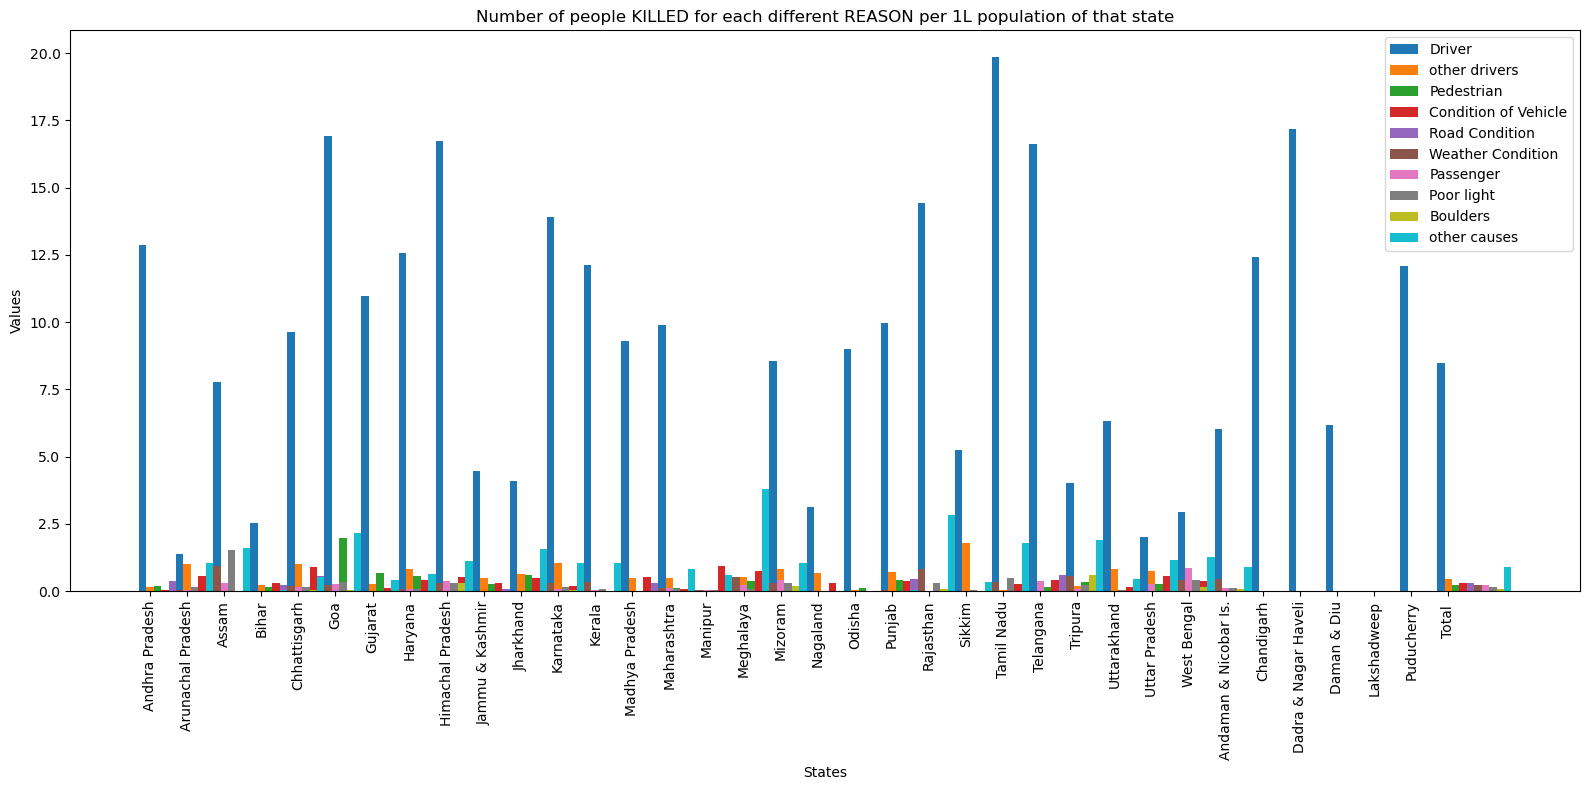

In [122]:
## Code for Plot
states = df5_clean_data.iloc[:, 1] 
columns = [
'Fault of Driver-Number of Persons-Killed - 2014 per 1L people',  
'Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people',
'Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people',
'Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people',
'Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people',
'Weather Condition-Number of Persons-Killed - 2014 per 1L people',
'Fault of Passenger-Number of Persons-Killed - 2014 per 1L people',
'Poor light-Number of Persons-Killed - 2014 per 1L people',
'Falling of boulders-Number of Persons-Killed - 2014 per 1L people',
'Other causes/causes not known-Number of Persons-Killed - 2014 per 1L people'
]

label = ['Driver','other drivers','Pedestrian','Condition of Vehicle','Road Condition','Weather Condition','Passenger','Poor light','Boulders','other causes']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of people KILLED for each different REASON per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 16.Number of people INJURED for each reason per 1L people of that state.

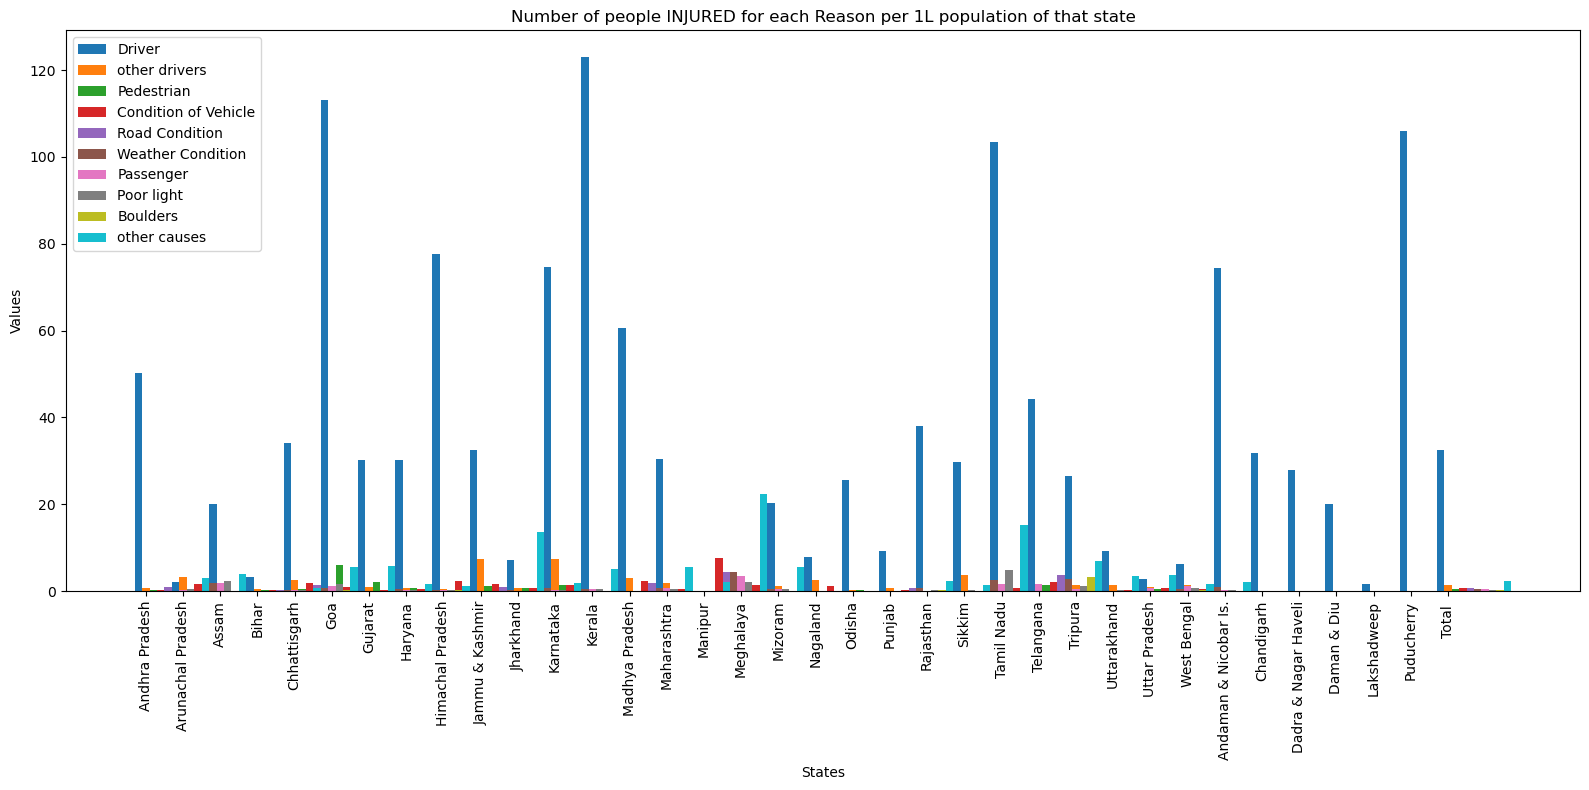

In [123]:
## Code for Plot
states = df5_clean_data.iloc[:, 1] 
columns = [
'Fault of Driver-Number of Persons-Injured - 2014 per 1L people',  
'Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people',
'Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people',
'Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people',
'Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people',
'Weather Condition-Number of Persons-Injured - 2014 per 1L people',
'Fault of Passenger-Number of Persons-Injured - 2014 per 1L people',
'Poor light-Number of Persons-Injured - 2014 per 1L people',
'Falling of boulders-Number of Persons-Injured - 2014 per 1L people',
'Other causes/causes not known-Number of Persons-Injured - 2014 per 1L people'
]

label = ['Driver','other drivers','Pedestrian','Condition of Vehicle','Road Condition','Weather Condition','Passenger','Poor light','Boulders','other causes']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of people INJURED for each Reason per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 17.Number of ACCIDENTS for each reason per 1L people of that state.

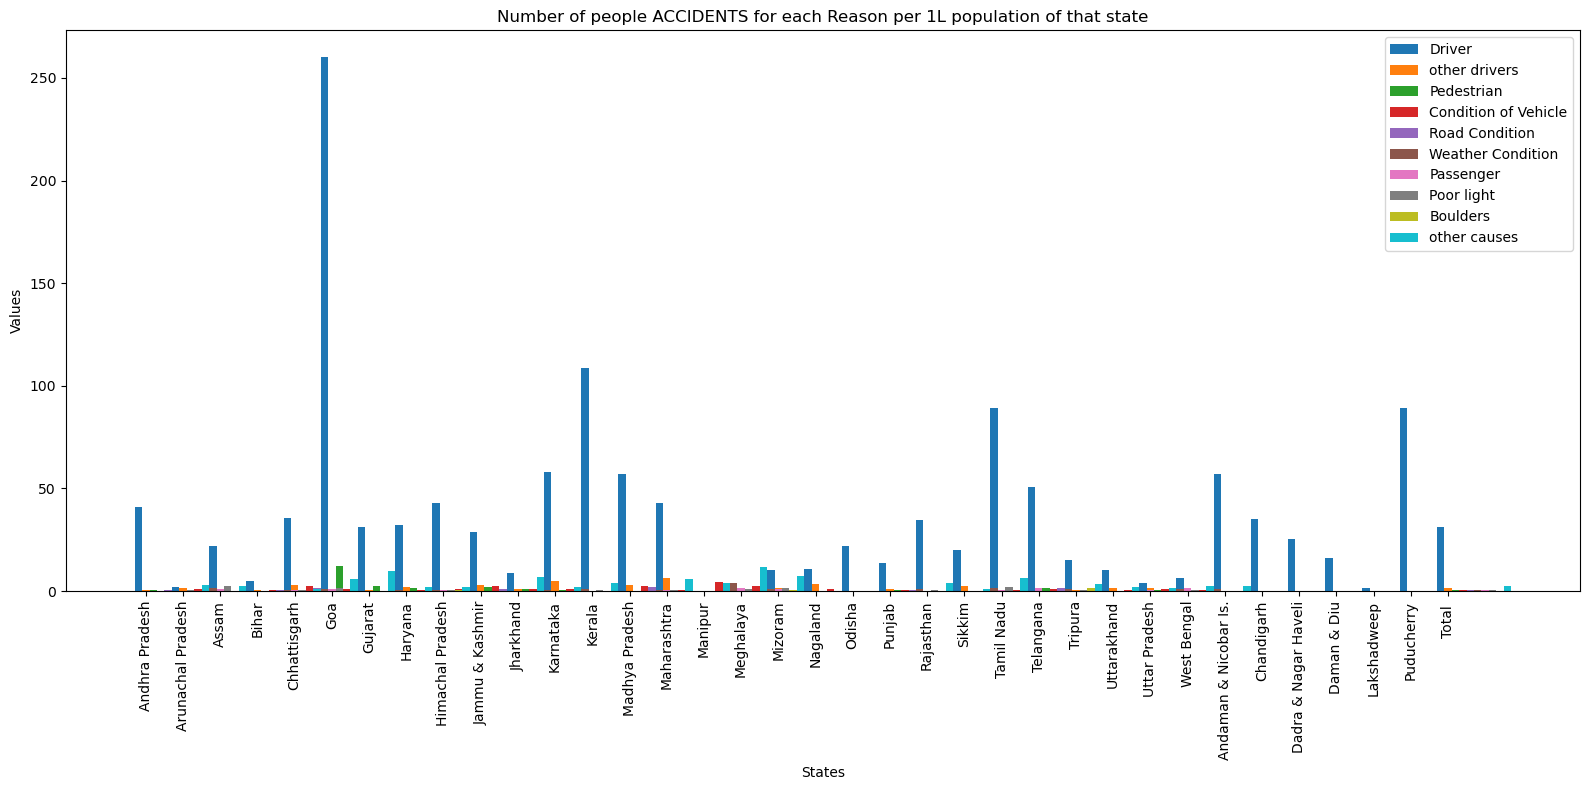

In [124]:
## Code for Plot
states = df5_clean_data.iloc[:, 1] 
columns = [
'Fault of Driver-Total No. of Road Accidents - 2014 per 1L people',  
'Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people',
'Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people',
'Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people',
'Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people',
'Weather Condition-Total No. of Road Accidents - 2014 per 1L people',
'Fault of Passenger-Total No. of Road Accidents - 2014 per 1L people',
'Poor light-Total No. of Road Accidents - 2014 per 1L people',
'Falling of boulders-Total No. of Road Accidents - 2014 per 1L people',
'Other causes/causes not known-Total No. of Road Accidents - 2014 per 1L people'
]

label = ['Driver','other drivers','Pedestrian','Condition of Vehicle','Road Condition','Weather Condition','Passenger','Poor light','Boulders','other causes']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Number of people ACCIDENTS for each Reason per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 18.Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state.

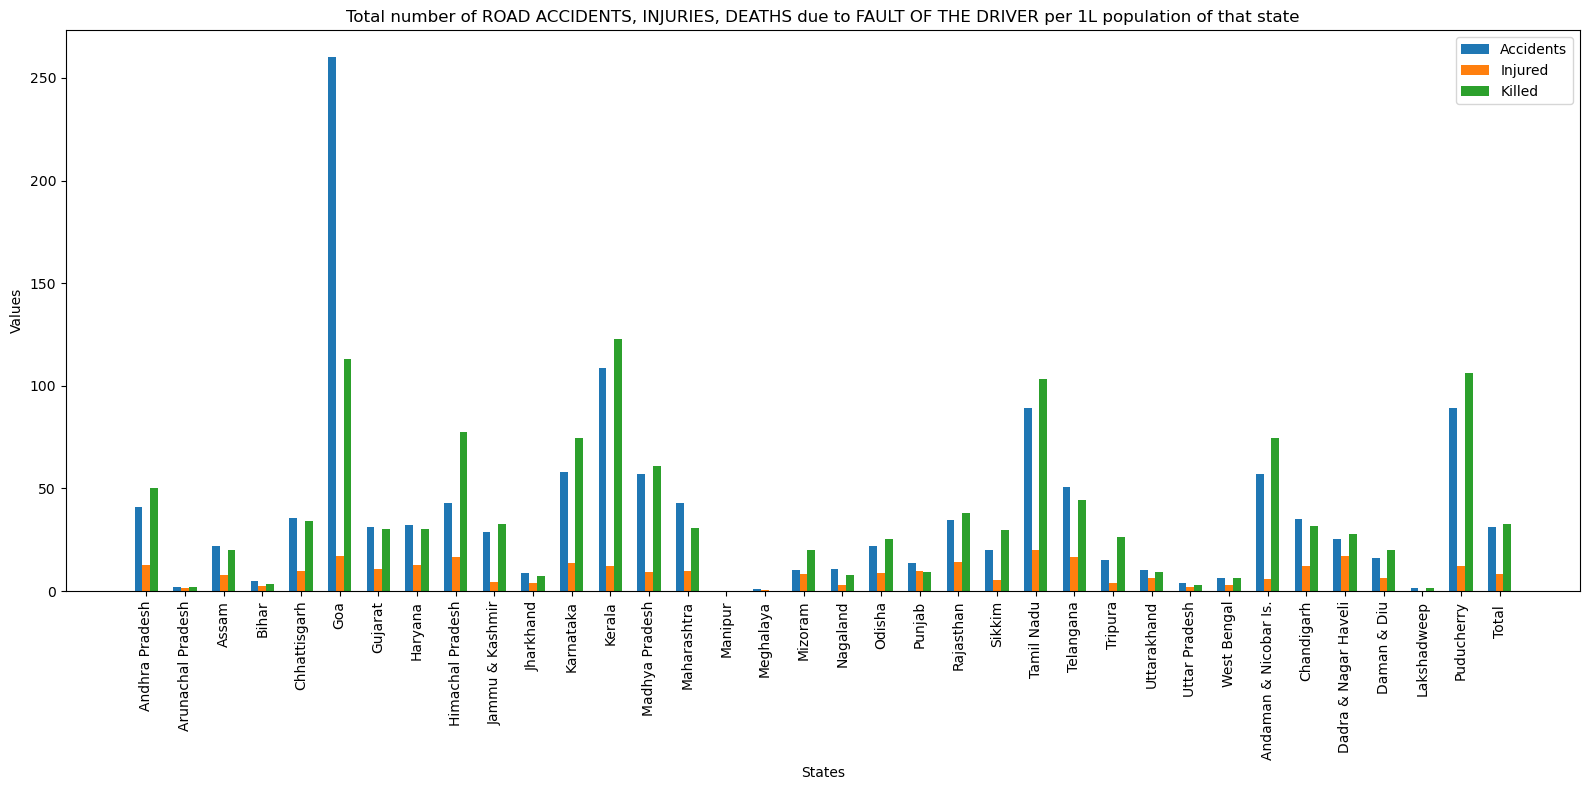

In [125]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Fault of Driver-Total No. of Road Accidents - 2014 per 1L people',                                                               
           'Fault of Driver-Number of Persons-Killed - 2014 per 1L people',                                                                    
           'Fault of Driver-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Define colors for the bars
colors = ['royalblue', 'darkorange', 'limegreen']

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF THE DRIVER per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### 19.Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF DRIVER'S FROM OTHER VEHICLES per 1L people of that state.

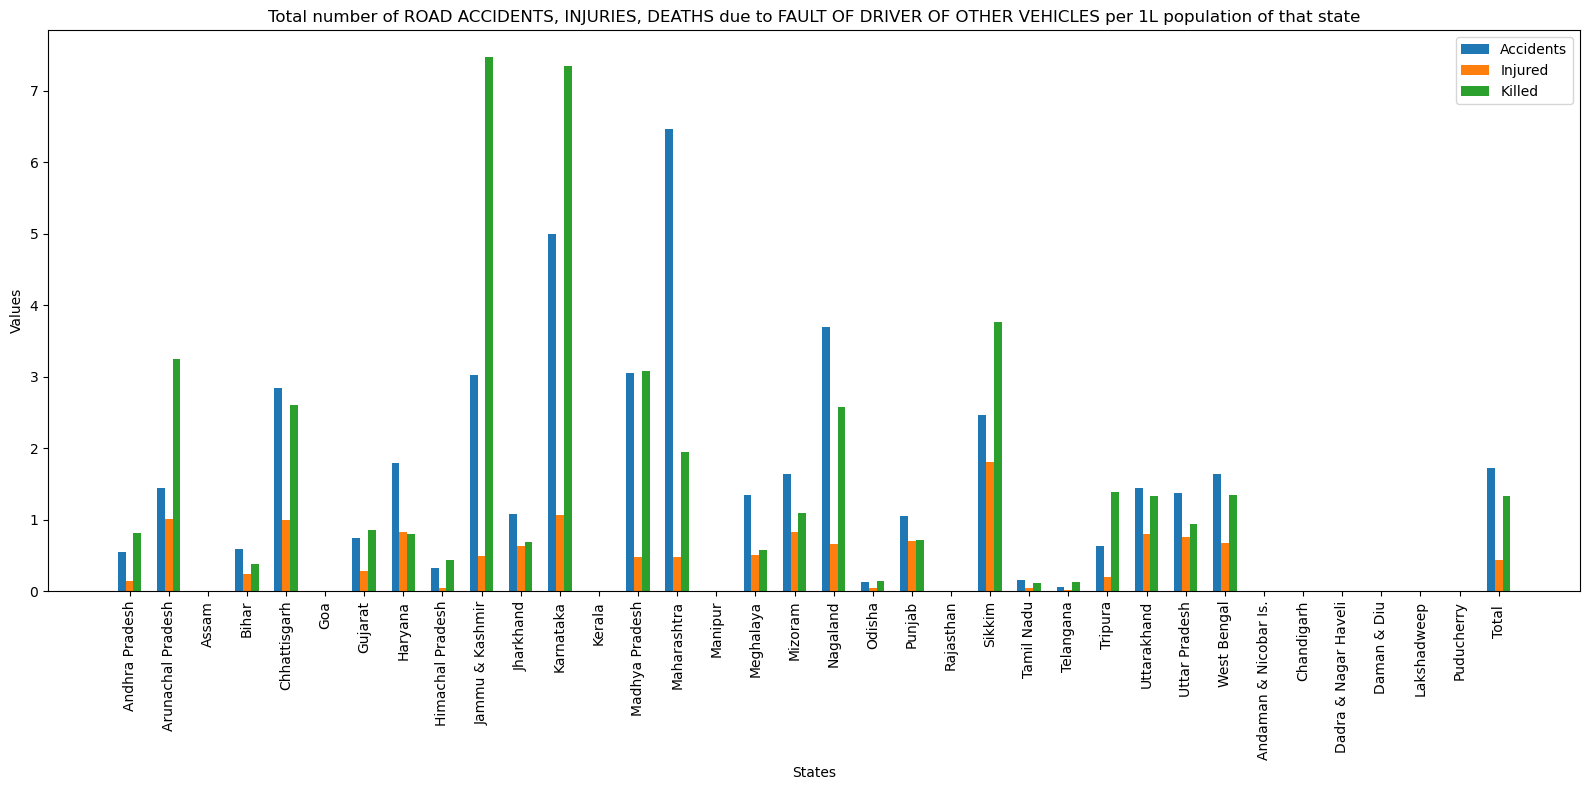

In [126]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Fault of Driver of other vehicles-Total No. of Road Accidents - 2014 per 1L people',                             
           'Fault of Driver of other vehicles-Number of Persons-Killed - 2014 per 1L people',                               
           'Fault of Driver of other vehicles-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF DRIVER OF OTHER VEHICLES per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### 20.Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the FAULT OF PEDESTRIANS per 1L people of that state

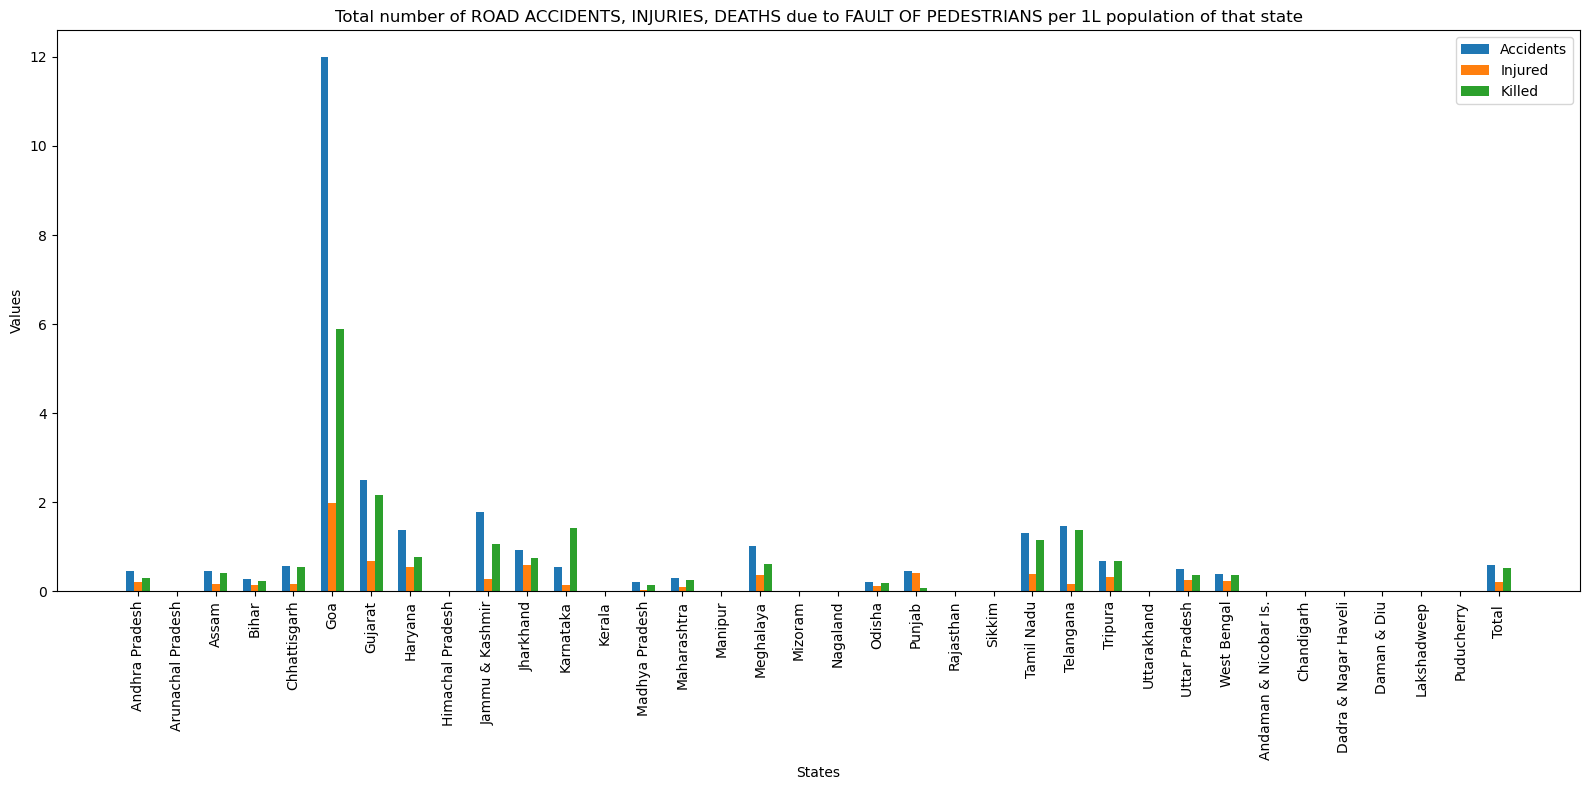

In [127]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Fault of Pedestrian-Total No. of Road Accidents - 2014 per 1L people',                             
           'Fault of Pedestrian-Number of Persons-Killed - 2014 per 1L people',                               
           'Fault of Pedestrian-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to FAULT OF PEDESTRIANS per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 21.Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L people of that state.

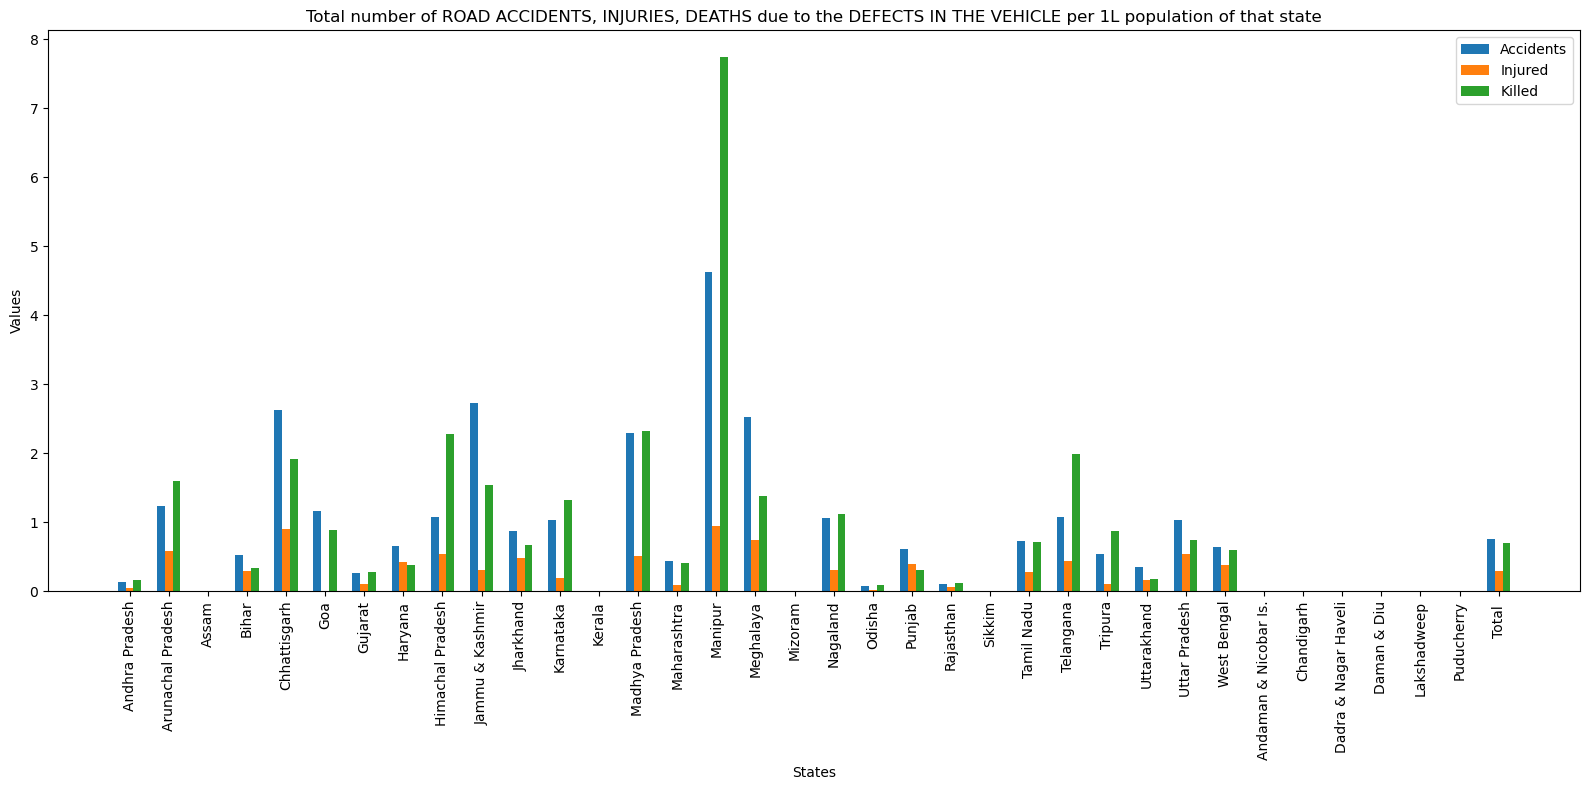

In [128]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Defect in Condition of Motor Vehicle-Total No. of Road Accidents - 2014 per 1L people',                             
           'Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people',                               
           'Defect in Condition of Motor Vehicle-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN THE VEHICLE per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 22.Defect in Condition of Motor Vehicle-Number of Persons-Killed - 2014 per 1L people

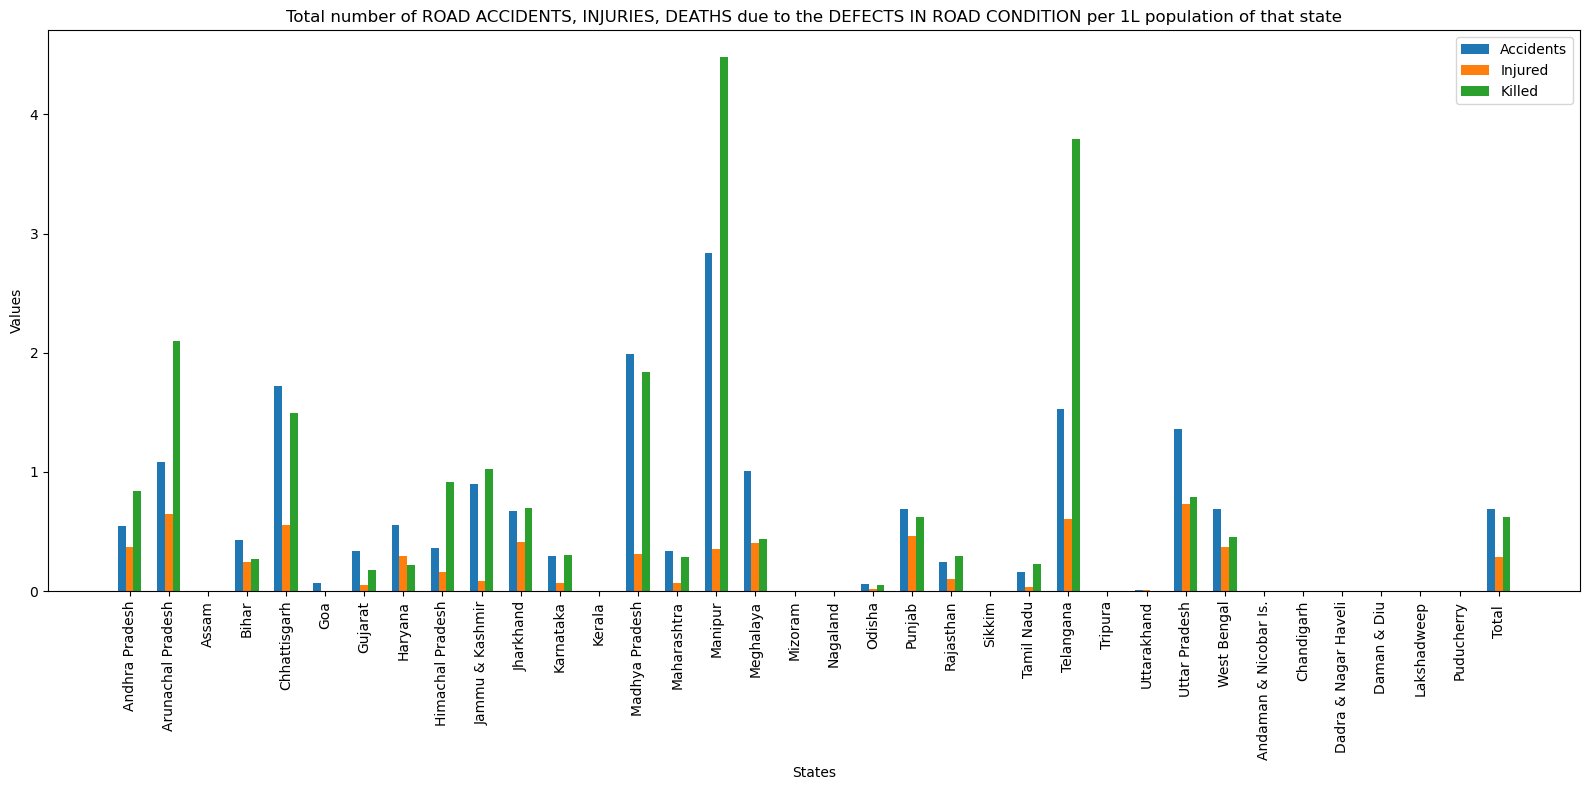

In [130]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Defect in Road Condition-Total No. of Road Accidents - 2014 per 1L people',                             
           'Defect in Road Condition-Number of Persons-Killed - 2014 per 1L people',                               
           'Defect in Road Condition-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to the DEFECTS IN ROAD CONDITION per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 23.Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L people of that state.

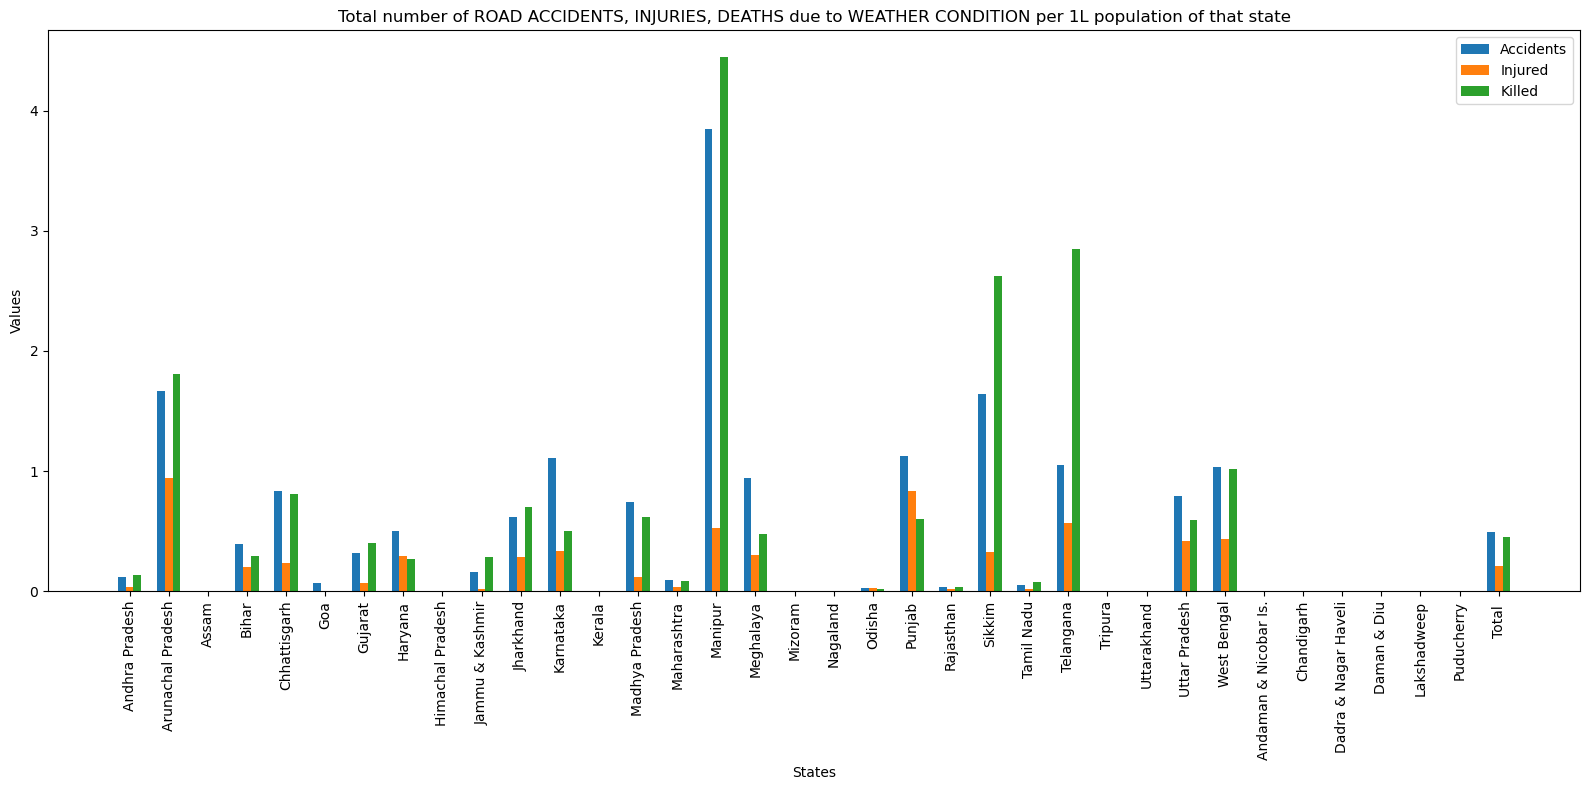

In [131]:
states = df5_clean_data.iloc[:, 1] 
columns = ['Weather Condition-Total No. of Road Accidents - 2014 per 1L people',                             
           'Weather Condition-Number of Persons-Killed - 2014 per 1L people',                               
           'Weather Condition-Number of Persons-Injured - 2014 per 1L people']

label = ['Accidents','Injured','Killed']

# Transpose the data to align it properly
data = df5_clean_data[columns].T.values

# Create DataFrame
df5_new = pd.DataFrame(data, columns=states, index=columns)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each column as a separate group of bars
for i, column in enumerate(columns):
    plt.bar(x + i * width, df5_new.loc[column], width=width, label=label[i])

plt.xlabel('States')
plt.ylabel('Values')
plt.title('Total number of ROAD ACCIDENTS, INJURIES, DEATHS due to WEATHER CONDITION per 1L population of that state')
plt.xticks(x + width, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 24.Number of Total Accidents for each vehicle type per 1L people of that state.

In [132]:
df6=pd.read_csv("typeOfVehicle.csv")

In [133]:
df6.shape

(37, 59)

In [134]:
df6.tail(2)

Sl. No.  States/UTs  \
35      36  Puducherry   
36  Total       Total    

    Two-Wheelers - Number of Road Accidents - Fatal - 2014  \
35                                                 45        
36                                              30064        

    Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people  \
35                                           3.605905                      
36                                           2.482874                      

    Two-Wheelers - Number of Road Accidents - Total - 2014  \
35                                                533        
36                                             133634        

    Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people  \
35                                          42.709942                      
36                                          11.036334                      

    Two-Wheelers - Number of Persons - Killed - 2014  \
35                                                55   
36                                             32524   

    Two-Wheelers - Number of Persons - Killed - 2014 per 1L people  \
35                                           4.407217                
36                                           2.686036                

    Two-Wheelers - Number of Persons - Injured - 2014  \
35                                                599   
36                                             127452   

    Two-Wheelers - Number of Persons - Injured - 2014 per 1L people  \
35                                          47.998603                 
36                                          10.525786                 

    Auto-Rickshaws - Number of Road Accidents - Fatal - 2014  \
35                                                  3          
36                                               5553          

    Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people  \
35                                           0.240394                        
36                                           0.458602                        

    Auto-Rickshaws - Number of Road Accidents - Total - 2014  \
35                                                 38          
36                                              31172          

    Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people  \
35                                           3.044986                        
36                                           2.574379                        

    Auto-Rickshaws - Number of Persons - Killed - 2014  \
35                                                  3    
36                                               6279    

    Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people  \
35                                           0.240394                  
36                                           0.518559                  

    Auto-Rickshaws - Number of Persons - Injured - 2014  \
35                                                 42     
36                                              40848     

    Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people  \
35                                           3.365511                   
36                                           3.373484                   

    Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014  \
35                                                 26             
36                                              22803             

    Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people  \
35                                           2.083412                           
36                                           1.883215                           

    Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014  \
35                                                231             
36                                             111218             

    Cars, Jeeps,Taxis - Number o

In [135]:
df6.isnull().sum()

Sl. No.                                                                                 0
States/UTs                                                                              0
Two-Wheelers - Number of Road Accidents - Fatal - 2014                                  0
Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people                    0
Two-Wheelers - Number of Road Accidents - Total - 2014                                  0
Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people                    0
Two-Wheelers - Number of Persons - Killed - 2014                                        0
Two-Wheelers - Number of Persons - Killed - 2014 per 1L people                          0
Two-Wheelers - Number of Persons - Injured - 2014                                       0
Two-Wheelers - Number of Persons - Injured - 2014 per 1L people                         0
Auto-Rickshaws - Number of Road Accidents - Fatal - 2014                                0
Auto-Ricks

In [136]:
df6_clean_data = df6.drop(index=36)

In [137]:
df6_clean_data.shape

(36, 59)

In [138]:
df6_clean_data

Sl. No.                 States/UTs  \
0        1             Andhra Pradesh   
1        2          Arunachal Pradesh   
2        3                      Assam   
3        4                      Bihar   
4        5               Chhattisgarh   
5        6                        Goa   
6        7                    Gujarat   
7        8                    Haryana   
8        9           Himachal Pradesh   
9       10            Jammu & Kashmir   
10      11                  Jharkhand   
11      12                  Karnataka   
12      13                     Kerala   
13      14             Madhya Pradesh   
14      15                Maharashtra   
15      16                    Manipur   
16      17                  Meghalaya   
17      18                    Mizoram   
18      19                   Nagaland   
19      20                     Odisha   
20      21                     Punjab   
21      22                  Rajasthan   
22      23                     Sikkim   
23      24                 Tamil Nadu   
24      25                  Telangana   
25      26                    Tripura   
26      27                Uttarakhand   
27      28              Uttar Pradesh   
28      29                West Bengal   
29      30  Andaman & Nicobar Islands   
30      31                 Chandigarh   
31      32       Dadra & Nagar Haveli   
32      33                Daman & Diu   
33      34                     Delhi    
34      35                Lakshadweep   
35      36                 Puducherry   

    Two-Wheelers - Number of Road Accidents - Fatal - 2014  \
0                                                1961        
1                                                  15        
2                                                 489        
3                                                 769        
4                                                1074        
5                                                 130        
6                                                1535        
7                                                 300        
8                                                 165        
9                                                 226        
10                                                538        
11                                               2473        
12                                                951        
13                                               2024        
14                                               3715        
15                                                 33        
16                                                 14        
17                                                 15        
18                                                 10        
19                                                989        
20                                               1080        
21                                               1851        
22                                                  5        
23                                               4570        
24                                               1342        
25                                                 37        
26                                                 81        
27                                               2189        
28                                               1257        
29                                                  4        
30                                                 20        
31                                                 12        
32                                                  8        
33                                                137        
34                                                  0        
35                                                 45        

    Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people  \
0                                            3.741606                      
1                                     

In [139]:
df6.iloc[:,1]

0                Andhra Pradesh
1             Arunachal Pradesh
2                         Assam
3                         Bihar
4                  Chhattisgarh
5                           Goa
6                       Gujarat
7                       Haryana
8              Himachal Pradesh
9               Jammu & Kashmir
10                    Jharkhand
11                    Karnataka
12                       Kerala
13               Madhya Pradesh
14                  Maharashtra
15                      Manipur
16                    Meghalaya
17                      Mizoram
18                     Nagaland
19                       Odisha
20                       Punjab
21                    Rajasthan
22                       Sikkim
23                   Tamil Nadu
24                    Telangana
25                      Tripura
26                  Uttarakhand
27                Uttar Pradesh
28                  West Bengal
29    Andaman & Nicobar Islands
30                   Chandigarh
31      

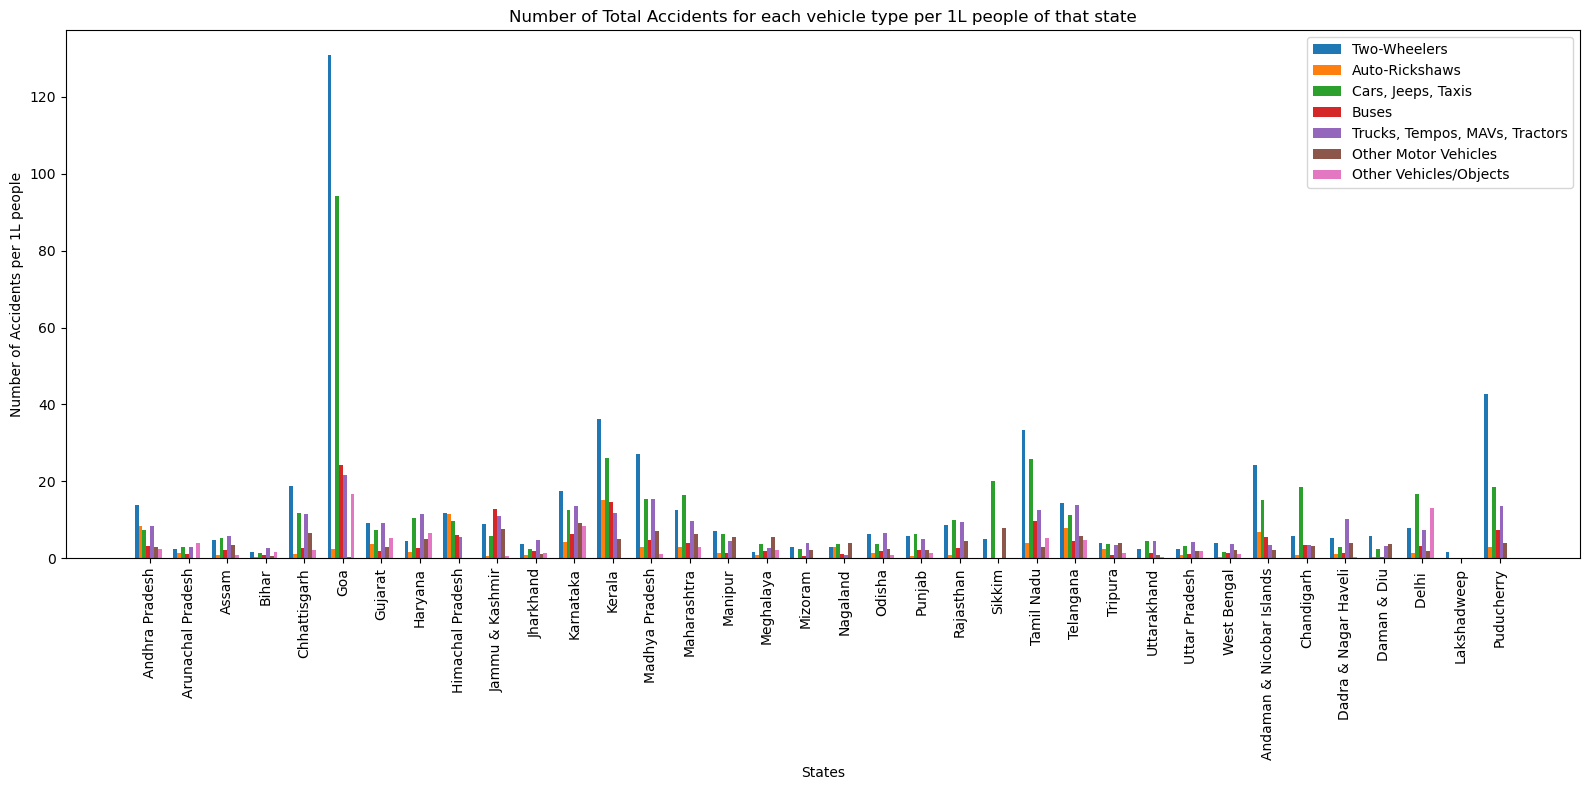

In [140]:
states = df6_clean_data.iloc[:, 1]
columns = [
    'Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people',  
    'Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people',
    'Buses - Number of Road Accidents - Total - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people',
    'Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people'
]

labels = [
    'Two-Wheelers', 'Auto-Rickshaws', 'Cars, Jeeps, Taxis', 'Buses',
    'Trucks, Tempos, MAVs, Tractors', 'Other Motor Vehicles', 'Other Vehicles/Objects'
]

# Create DataFrame
df6_new = df6_clean_data[columns]
df6_new.columns = labels
df6_new.insert(0, 'States', states)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.1

# Plot each vehicle type as a separate group of bars
for i, label in enumerate(labels):
    plt.bar(x + i * width, df6_new[label], width=width, label=label)

plt.xlabel('States')
plt.ylabel('Number of Accidents per 1L people')
plt.title('Number of Total Accidents for each vehicle type per 1L people of that state')
plt.xticks(x + width * len(labels) / 2, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


### 25.Number of Persons Killed for each vehicle type per 1L people of that state

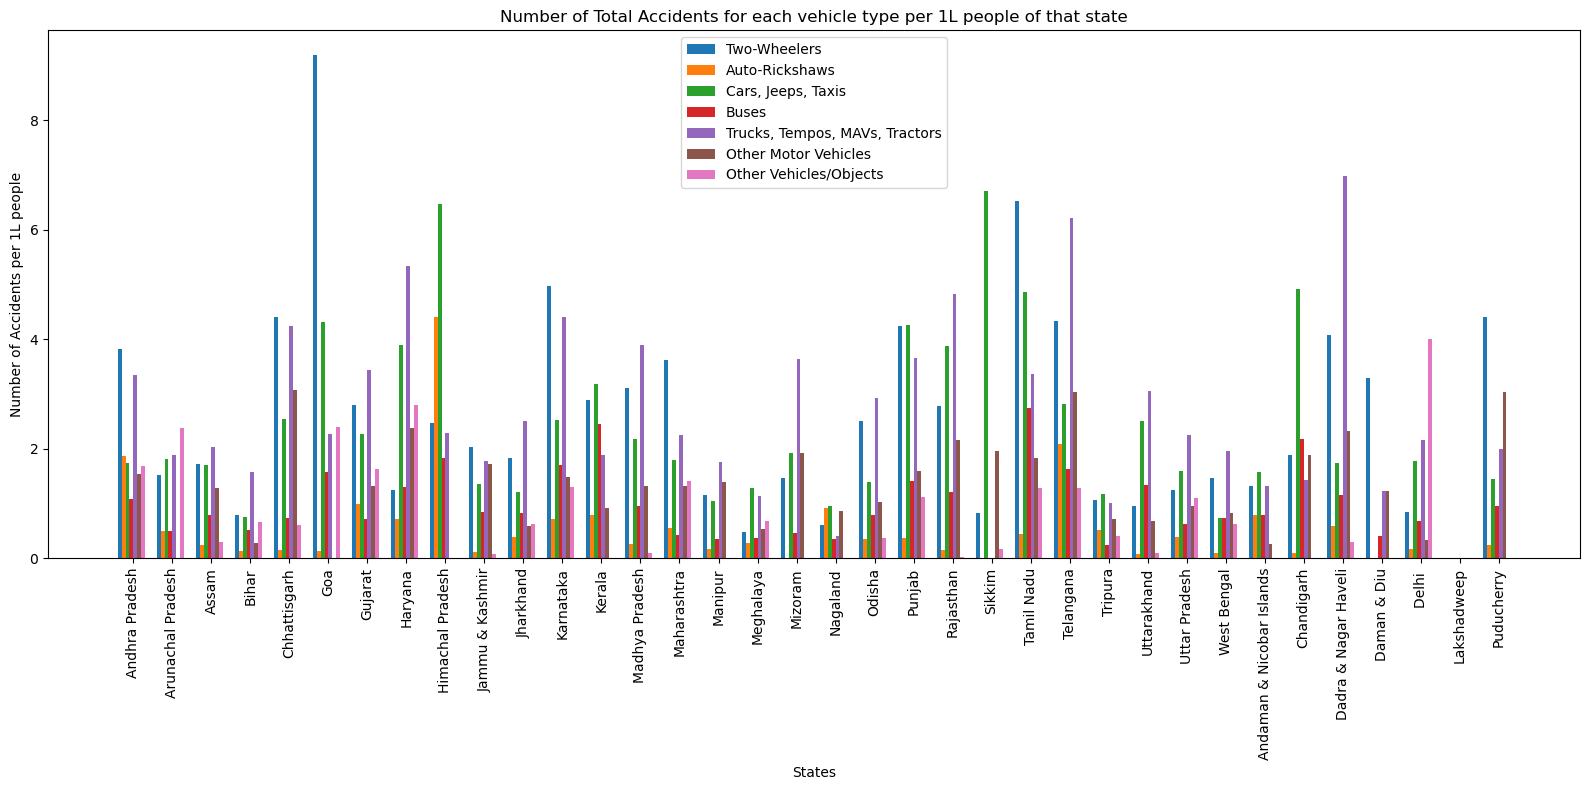

In [142]:
states = df6_clean_data.iloc[:, 1]
columns = [
    'Two-Wheelers - Number of Persons - Killed - 2014 per 1L people',  
    'Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people',
    'Buses - Number of Persons - Killed - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people',
    'Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people'
]

labels = [
    'Two-Wheelers', 'Auto-Rickshaws', 'Cars, Jeeps, Taxis', 'Buses',
    'Trucks, Tempos, MAVs, Tractors', 'Other Motor Vehicles', 'Other Vehicles/Objects'
]
# Create DataFrame
df6_new = df6_clean_data[columns]
df6_new.columns = labels
df6_new.insert(0, 'States', states)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.1

# Plot each vehicle type as a separate group of bars
for i, label in enumerate(labels):
    plt.bar(x + i * width, df6_new[label], width=width, label=label)

plt.xlabel('States')
plt.ylabel('Number of Accidents per 1L people')
plt.title('Number of Total Accidents for each vehicle type per 1L people of that state')
plt.xticks(x + width * len(labels) / 2, states, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

### 26.Total accidents, fatal accidents, killed and injured for each state per 1L people of that state.


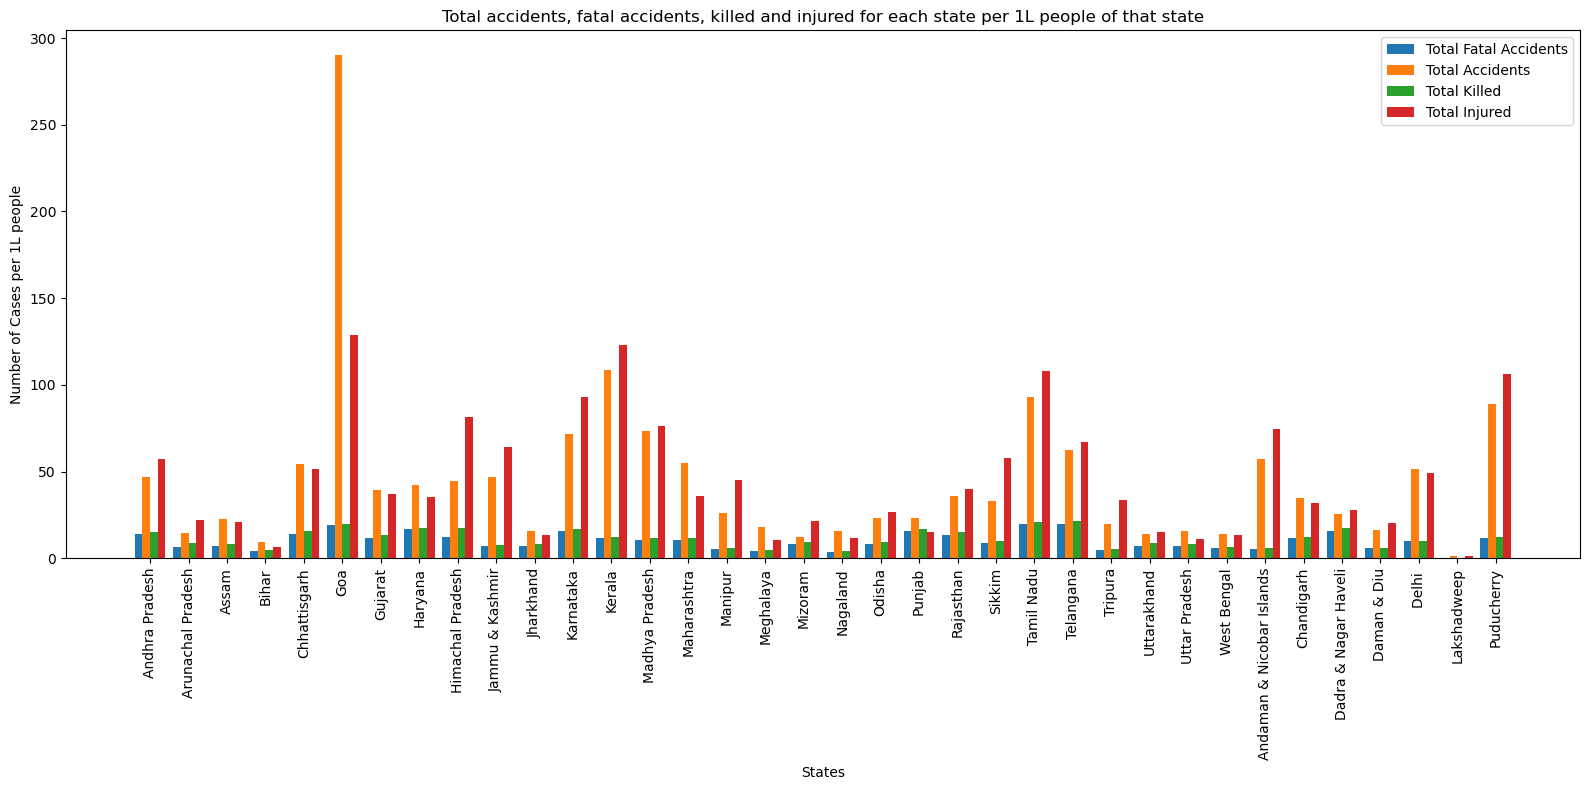

In [143]:
states = df6_clean_data.iloc[:, 1]
columns = [
    'Two-Wheelers - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Two-Wheelers - Number of Road Accidents - Total - 2014 per 1L people',
    'Two-Wheelers - Number of Persons - Killed - 2014 per 1L people',
    'Two-Wheelers - Number of Persons - Injured - 2014 per 1L people',
    'Auto-Rickshaws - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Auto-Rickshaws - Number of Road Accidents - Total - 2014 per 1L people',
    'Auto-Rickshaws - Number of Persons - Killed - 2014 per 1L people',
    'Auto-Rickshaws - Number of Persons - Injured - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Road Accidents - Total - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Persons - Killed - 2014 per 1L people',
    'Cars, Jeeps,Taxis - Number of Persons - Injured - 2014 per 1L people',
    'Buses - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Buses - Number of Road Accidents - Total - 2014 per 1L people',
    'Buses - Number of Persons - Killed - 2014 per 1L people',
    'Buses - Number of Persons - Injured - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Road Accidents - Total - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Persons - Killed - 2014 per 1L people',
    'Trucks, Tempos,MAVs,Tractors - Number of Persons - Injured - 2014 per 1L people',
    'Other Motor Vehicles - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Other Motor Vehicles - Number of Road Accidents - Total - 2014 per 1L people',
    'Other Motor Vehicles - Number of Persons - Killed - 2014 per 1L people',
    'Other Motor Vehicles - Number of Persons - Injured - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Road Accidents - Fatal - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Road Accidents - Total - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Persons - Killed - 2014 per 1L people',
    'Other Vehicles/Objects - Number of Persons - Injured - 2014 per 1L people'
]

# Summing up the relevant columns for each category
df6_clean_data['Total Fatal Accidents'] = df6_clean_data[[col for col in columns if 'Fatal' in col]].sum(axis=1)
df6_clean_data['Total Accidents'] = df6_clean_data[[col for col in columns if 'Total' in col]].sum(axis=1)
df6_clean_data['Total Killed'] = df6_clean_data[[col for col in columns if 'Killed' in col]].sum(axis=1)
df6_clean_data['Total Injured'] = df6_clean_data[[col for col in columns if 'Injured' in col]].sum(axis=1)

# Create DataFrame for the plot
df_summary = df6_clean_data[['Total Fatal Accidents', 'Total Accidents', 'Total Killed', 'Total Injured']]
df_summary.insert(0, 'States', states)

# Plotting
plt.figure(figsize=(16, 8))

# Get positions for each bar group
x = np.arange(len(states))

# Width of the bars
width = 0.2

# Plot each category as a separate group of bars
for i, column in enumerate(['Total Fatal Accidents', 'Total Accidents', 'Total Killed', 'Total Injured']):
    plt.bar(x + i * width, df_summary[column], width=width, label=column)

plt.xlabel('States')
plt.ylabel('Number of Cases per 1L people')
plt.title('Total accidents, fatal accidents, killed and injured for each state per 1L people of that state')
plt.xticks(x + width * 1.5, states, rotation=90)  # Adjust x-ticks to be centered
plt.legend()
plt.tight_layout()
plt.show()


### 27.Number of Accidents happening in DAY and NIGHT TIME for 2014 and 2016.


In [145]:
df7 = pd.read_excel('timeOfOccurence.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [146]:
df7.shape

(37, 20)

In [147]:
df7.tail(2)

S. No.  States/Uts  06-900hrs - Day - 2014  09-1200hrs - Day - 2014  \
35     36  Puducherry                     115                      155   
36  Total       Total                   53450                    78137   

    12-1500hrs - Day - 2014  15-1800hrs - Day - 2014  \
35                      178                      203   
36                    76384                    84436   

    18-2100hrs - Night - 2014  21-2400hrs - Night - 2014  \
35                        251                        139   
36                      83254                      52570   

    00-300hrs - Night - 2014  03-600hrs - Night - 2014  \
35                        29                        41   
36                     29179                     31990   

    Total Accidents - 2014  06-900hrs - (Day) - 2016  \
35                    1111                       221   
36                  489400                     54522   

    09-1200hrs - (Day) - 2016  12-1500hrs - (Day) - 2016  \
35                        233                        246   
36                      75771                      73380   

    15-1800hrs - (Day) - 2016  18-2100hrs - (Night) - 2016  \
35                        253                          330   
36                      85834                        84555   

    21-2400hrs - (Night) - 2016  00-300hrs - (Night) - 2016  \
35                          239                         144   
36                        50970                       25976   

    03-600hrs - (Night) - 2016  Total Accidents - 2016  
35                         100                    1766  
36                       29644                  480652

In [148]:
df7.isnull().sum()

S. No.                         0
States/Uts                     0
06-900hrs - Day - 2014         0
09-1200hrs - Day - 2014        0
12-1500hrs - Day - 2014        0
15-1800hrs - Day - 2014        0
18-2100hrs - Night - 2014      0
21-2400hrs - Night - 2014      0
00-300hrs - Night - 2014       0
03-600hrs - Night - 2014       0
Total Accidents - 2014         0
06-900hrs - (Day) - 2016       0
09-1200hrs - (Day) - 2016      0
12-1500hrs - (Day) - 2016      0
15-1800hrs - (Day) - 2016      0
18-2100hrs - (Night) - 2016    0
21-2400hrs - (Night) - 2016    0
00-300hrs - (Night) - 2016     0
03-600hrs - (Night) - 2016     0
Total Accidents - 2016         0
dtype: int64

In [149]:
df7.iloc[:,1]

0        Andhra Pradesh
1     Arunachal Pradesh
2                 Assam
3                 Bihar
4          Chhattisgarh
5                   Goa
6               Gujarat
7               Haryana
8      Himachal Pradesh
9       Jammu & Kashmir
10            Jharkhand
11            Karnataka
12               Kerala
13       Madhya Pradesh
14          Maharashtra
15              Manipur
16            Meghalaya
17              Mizoram
18             Nagaland
19               Orissa
20               Punjab
21            Rajasthan
22               Sikkim
23           Tamil Nadu
24            Telangana
25              Tripura
26          Uttarakhand
27        Uttar Pradesh
28          West Bengal
29        A & N Islands
30           Chandigarh
31         D & N Haveli
32          Daman & Diu
33                Delhi
34          Lakshadweep
35           Puducherry
36                Total
Name: States/Uts, dtype: object

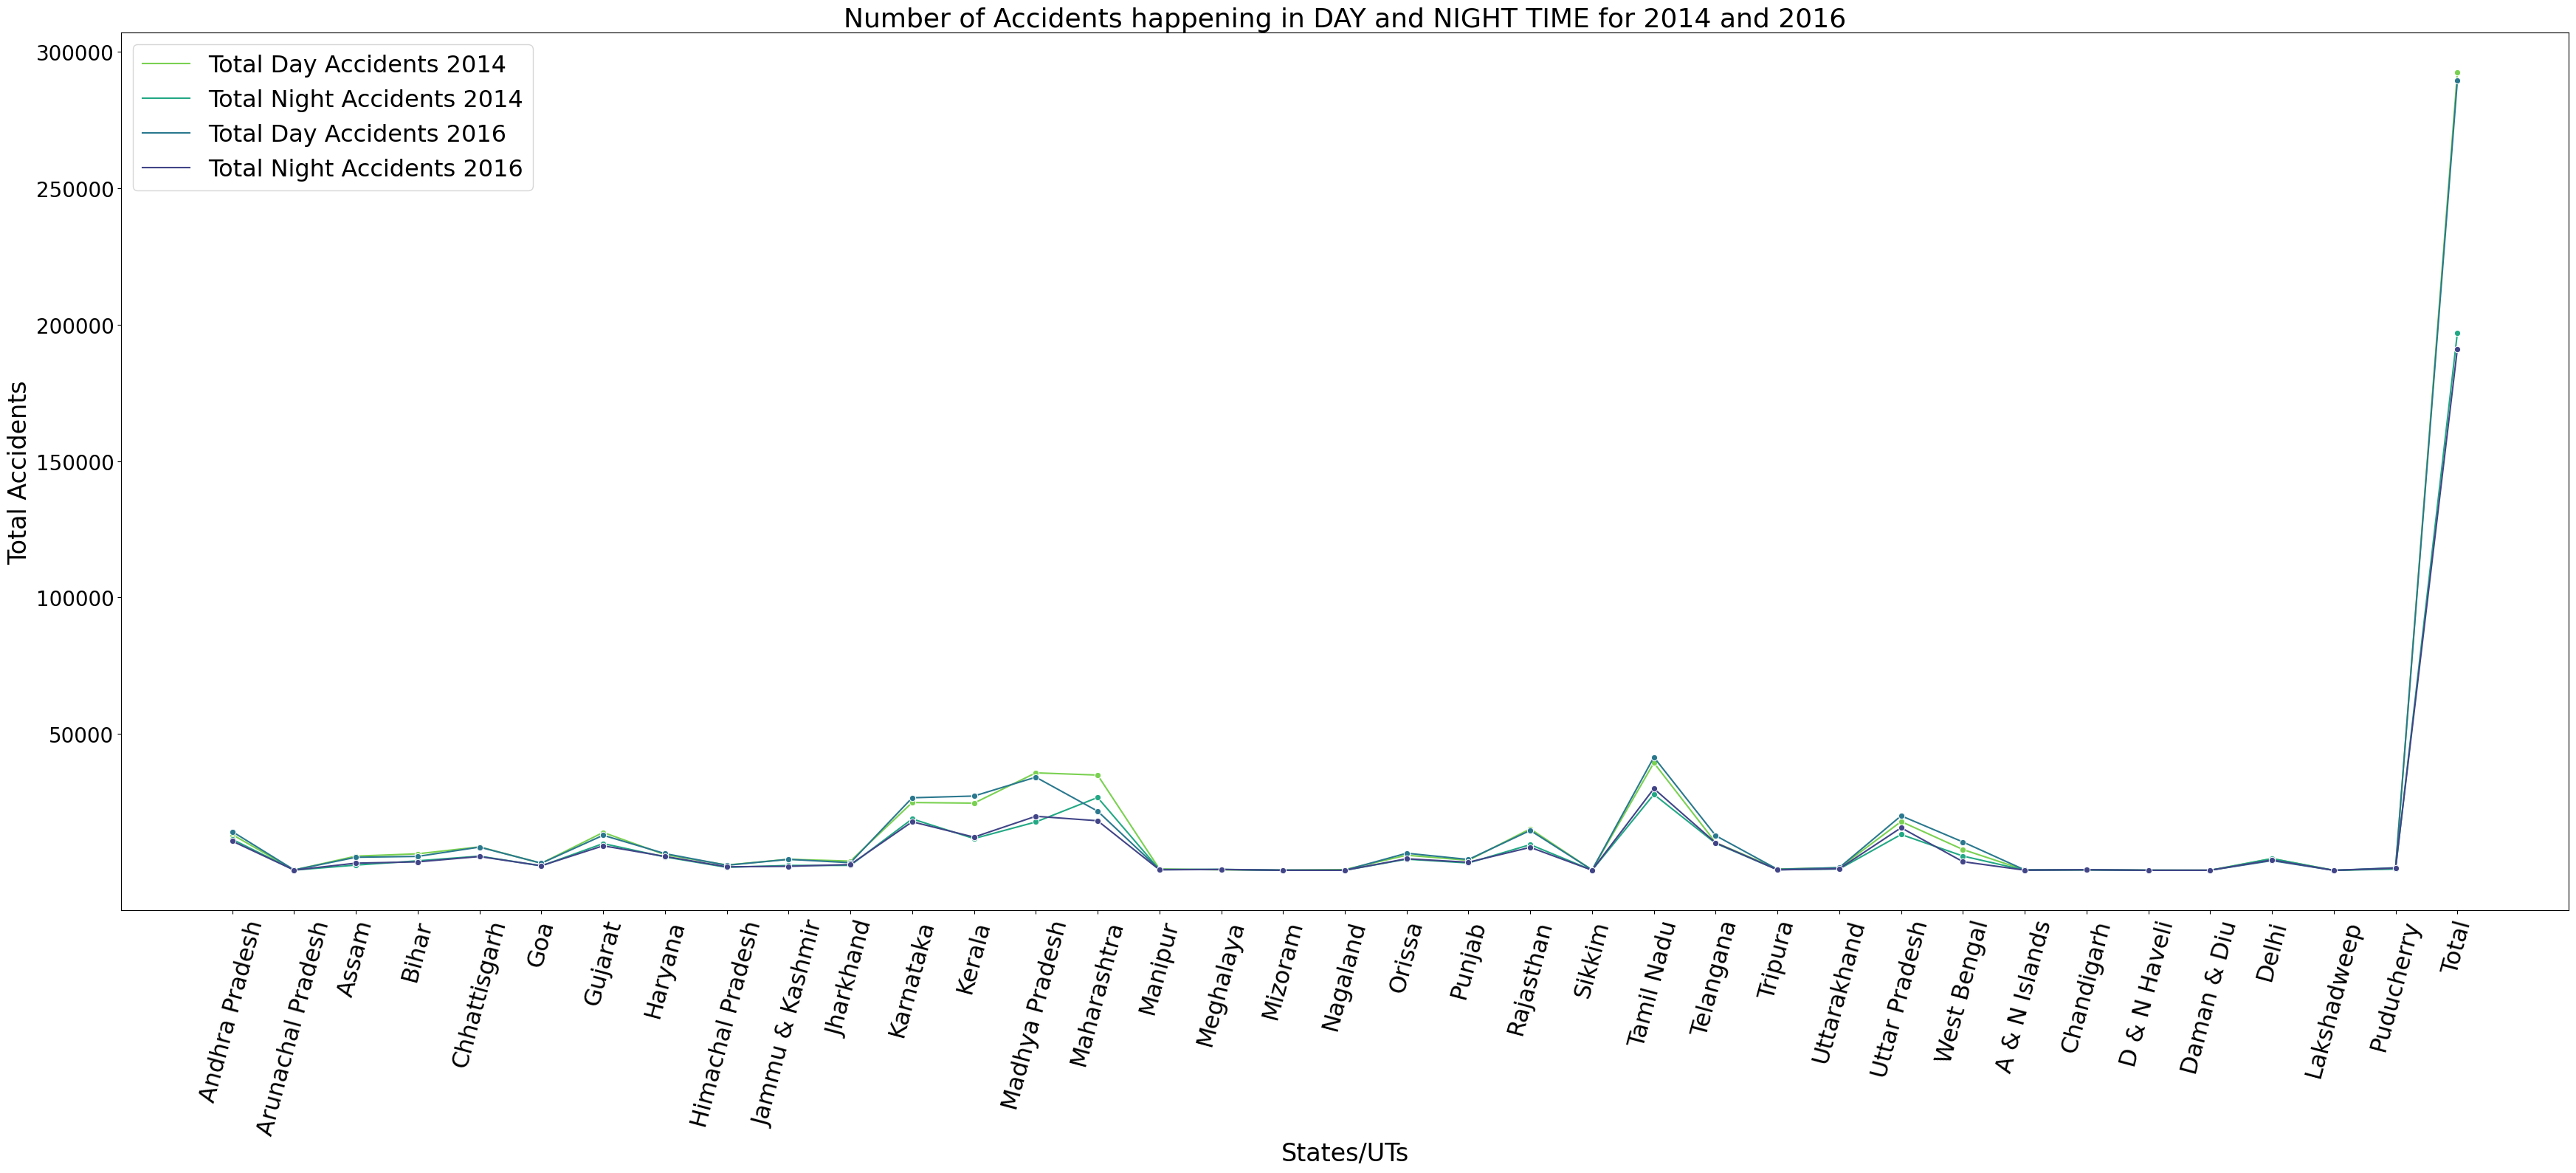

In [150]:
states = df7['States/Uts']

# Adjust column names based on the actual columns in your DataFrame
day_columns_2014 = [
    '06-900hrs - Day - 2014', '09-1200hrs - Day - 2014',
    '12-1500hrs - Day - 2014', '15-1800hrs - Day - 2014'
]
night_columns_2014 = [
    '18-2100hrs - Night - 2014', '21-2400hrs - Night - 2014',
    '00-300hrs - Night - 2014', '03-600hrs - Night - 2014'
]

day_columns_2016 = [
    '06-900hrs - (Day) - 2016', '09-1200hrs - (Day) - 2016',
    '12-1500hrs - (Day) - 2016', '15-1800hrs - (Day) - 2016'
]
night_columns_2016 = [
    '18-2100hrs - (Night) - 2016', '21-2400hrs - (Night) - 2016',
    '00-300hrs - (Night) - 2016', '03-600hrs - (Night) - 2016'
]

# Sum the relevant columns to get total day and night accidents for 2014 and 2016
df7['Total Day Accidents 2014'] = df7[day_columns_2014].sum(axis=1)
df7['Total Night Accidents 2014'] = df7[night_columns_2014].sum(axis=1)
df7['Total Day Accidents 2016'] = df7[day_columns_2016].sum(axis=1)
df7['Total Night Accidents 2016'] = df7[night_columns_2016].sum(axis=1)

# Create DataFrame for the plot
df_summary = df7[['States/Uts', 'Total Day Accidents 2014', 'Total Night Accidents 2014', 'Total Day Accidents 2016', 'Total Night Accidents 2016']]

# Melt the DataFrame for seaborn
df_melted = df_summary.melt(id_vars='States/Uts', var_name='Category', value_name='Total Accidents')

# Plotting
fig, ax = plt.subplots(figsize=(35, 16))
sns.lineplot(data=df_melted, x='States/Uts', y='Total Accidents', hue='Category', palette='viridis_r', marker='o', ax=ax)

# Customize the plot
plt.xticks(rotation=75, fontsize=23)
plt.yticks(np.arange(50000, 350000, 50000),fontsize=20)
plt.xlabel('States/UTs', fontsize=24)
plt.ylabel('Total Accidents', fontsize=24)
plt.legend(loc='best', prop={'size': 23})
plt.title('Number of Accidents happening in DAY and NIGHT TIME for 2014 and 2016', fontsize=26)
plt.tight_layout()
plt.show()
